# Introducción a las series de tiempo

## Fundamentos estadísticos para la predicción

- En esta sección se presentan algunos métodos estadísticos básicos, los cuales son esenciales para modelar, analizar y predecir datos de series temporales. Se presentan gráficos y resúmenes numéricos de las propiedades de los datos de series temporales. También se analiza el uso de transformaciones y ajustes de datos en la predicción y algunos métodos ampliamente utilizados para caracterizar y controlar el rendimiento de un modelo predictivo. Algunos aspectos de como estas medidas de rendimiento pueden usarse para seleccionar entre técnicas de predicción son presentados. `Las predicciones se basan en datos u observaciones sobre la variable de interés. Estos datos suelen adoptar la forma de una serie temporal`

````{prf:definition}
:label: forecast_error

- Supongamos que se dispone de $T$ periodos de datos disponibles, siendo el periodo $T$ el más reciente. Denotemos por $y_{t}$ la observación de esta variable en el periodo de tiempo $t, t = 1,2,\dots, T$. En general, tendremos que distinguir entre una `predicción o valor predicho` de $y_{t}$ que se hizo en algún periodo de tiempo previo, digamos, $t-\tau$ y un `valor ajustado` de $y_{t}$ que ha resultado de la estimación de los parámetros de un modelo de series temporales a datos históricos. Tenga en cuenta que $\tau$ es el `horizonte de predicción`. 

- La predicción realizada en el periodo de tiempo $t-\tau$ se denota por $\hat{y}_{t}(t-\tau)$. Hay mucho interés en la predicción basada en el tiempo previo $lead-1$, que es la predicción de la observación en el periodo $t$, $y_{t}$, realizada un periodo previo, $\hat{y}_{t}(t - 1)$. Denotaremos el valor ajustado de $y_{t}$ por $\hat{y}_{t}$. También nos interesará analizar los `errores de predicción`. El error de predicción que resulta de una predicción de $y_{t}$ que se realizó en el periodo de tiempo $t-\tau$ es el `error de predicción` $lead - \tau$

    $$
    \\[2mm]
    e_{t}(\tau)=y_{t}-\hat{y}_{t}(t-\tau).
    $$

    Por ejemplo, el error de predicción $lead - 1$ es

$$
e_{t}(1)=y_{t}-\hat{y}_{t}(t-1).
$$

- La diferencia entre la observación $y_{t}$ y el valor obtenido ajustando un modelo de series temporales a los datos, o un valor ajustado $\hat{y}_{t}$ definido anteriormente, se denomina `residual`, y se denota por

$$
e_{t}=y_{t}-\hat{y}_{t}.
$$
````

```{admonition} Observación
:class: tip

- La razón de esta cuidadosa distinción entre `error de predicción` y `residual` es que los modelos suelen ajustarse mejor a los datos históricos de lo que pronostican. Es decir, los `residuos` de un proceso de ajuste de modelo casi siempre serán menores que los `errores de predicción` que se experimentan cuando ese modelo se utiliza para pronosticar observaciones futuras.

- La variable $y_{t}$ puede representar una cantidad acumulada, como la `demanda total de un producto` durante el periodo $t$, o una cantidad instantánea, como el `precio de cierre diario de una acción` concreta en la Bolsa de Nueva York.

```

## Diferentes tipos de datos

Los analistas de negocio y científicos de datos se encuentran con diferentes tipos de datos en sus proyectos de análisis. La mayoría de los datos que se suelen encontrar en proyectos académicos e industriales se pueden clasificar a grandes rasgos en las siguientes categorías:

- **`Datos transversales`**
- **`Datos de series temporales`**
- **`Datos de panel`**

Comprender qué tipo de datos se necesitan para resolver un problema y qué tipo de datos pueden obtenerse de las fuentes disponibles es importante para formular el problema y elegir el tipo de datos más adecuado`.

## Datos transversales

- Los datos transversales o de corte transversal de una población se obtienen tomando observaciones de múltiples individuos en el mismo momento. Los datos transversales `pueden incluir observaciones tomadas en distintos momentos, pero en estos casos el tiempo no desempeña ningún papel significativo en el análisis`. Los resultados de la selectividad de los estudiantes es un ejemplo de datos transversales. El producto interno bruto de los países y los datos para el análisis de pérdida de clientes es otro ejemplo de datos transversales. 

```{admonition} Observación
:class: tip

Nótese que, en el caso de las puntuaciones `SAT` de los estudiantes y el `PIB` de los países, `todas las observaciones se han tomado en un solo año`, lo que hace que los dos conjuntos de datos sean transversales. En esencia, los datos transversales representan un instante o momento dado en ambos casos. Sin embargo, los datos de clientes para el `análisis de rotación pueden obtenerse a lo largo de un periodo de tiempo`, como años y meses. `Pero a efectos de análisis, el tiempo puede no desempeñar un papel importante` y, por lo tanto, aunque los datos de rotación de clientes pueden obtenerse de múltiples puntos en el tiempo, pueden seguir considerándose como un conjunto de datos transversal.

```

- A menudo, el análisis de datos transversales comienza con un gráfico de las variables, para visualizar sus propiedades estadísticas como la `tendencia central, la dispersión, la asimetría y la curtosis`. En el siguiente ejemplo univariado se muestra el `gasto militar como porcentaje del Producto Interno Bruto` de 85 países en el año 2010. `Al tomar los datos de un solo año aseguramos su naturaleza transversal`. La figura combina un `histograma normalizado` y un `gráfico de densidad de kernel` para resaltar las diferentes propiedades estadísticas de los datos de gasto militar.

- Utilizaremos `seaborn` en este caso para realizar las visualizaciones. Para temas diferentes al seleccionado (ver [seaborn templates](https://www.python-graph-gallery.com/104-seaborn-themes)). Para descargar todos los datos que serán utilizados en este curso (ver [Dataset for TSF](https://github.com/lihkir/Data/blob/main/datasets.zip))

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [13]:
sns.set_style("darkgrid")

In [14]:
data = pd.read_csv('datasets/WDIData.csv')
print('Column names:', data.columns)

Column names: Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', 'Unnamed: 61'],
      dtype='object')


- También podemos hacernos una idea del tamaño de los datos en número de filas y columnas ejecutando la siguiente línea

In [15]:
print('No. of rows, columns:', data.shape)

No. of rows, columns: (401016, 62)


- Este conjunto de datos tiene, 401016 filas porque recoge 1504 indicadores de desarrollo mundial para 264 países diferentes. Esta información sobre el número único de indicadores y países puede obtenerse ejecutando las líneas siguientes

In [16]:
nb_countries = data['Country Code'].unique().shape[0]
print('Unique number of countries:', nb_countries)

Unique number of countries: 264


- Como se desprende de la estructura de los datos, cada fila ofrece las observaciones sobre un indicador, que se identifica mediante las columnas `Indicator Name` y `Indicator Code`, y sobre el país, que se indica mediante las columnas `Country Name` y `Country Code`. Las columnas de 1960 a 2016 tienen los valores de un indicador durante el mismo periodo de tiempo. En esta comprensión de cómo se disponen los datos en el `DataFrame`, ahora estamos preparados para extraer las filas y columnas que son relevantes para nuestra visualización.

- Comencemos preparando otros dos `DataFrame` que obtengan las filas correspondientes a los indicadores `Total Central Government Debt (as % of GDP)` y `Military expenditure (% of GDP)` para todos los países. Esto se hace por medio del `DataFrame` original de la siguiente manera

In [17]:
central_govt_debt = data.loc[data['Indicator Name']=='Central government debt, total (% of GDP)']
military_exp = data.loc[data['Indicator Name']=='Military expenditure (% of GDP)']

- Las dos líneas anteriores crean dos nuevos `DataFrame`, a saber, `central_govt_debt` y `militar_exp`. Una comprobación rápida de la forma de estos `DataFrame` puede hacerse ejecutando las dos líneas siguientes

In [18]:
print('Shape of central_govt_debt:', central_govt_debt.shape)
print('Shape of military_exp:', military_exp.shape)

Shape of central_govt_debt: (264, 62)
Shape of military_exp: (264, 62)


- Estos `DataFrame` contienen toda la información que necesitamos. Para trazar los datos univariantes y transversales. Necesitaremos la columna 2010. Antes de ejecutar el código para el trazado, comprobemos rápidamente si falta la columna 2010. Esto se hace mediante las dos líneas siguientes

In [19]:
central_govt_debt['2010'].describe()

count     94.000000
mean      53.048479
std       29.790674
min        0.519665
25%       28.357797
50%       49.540245
75%       75.259012
max      161.596402
Name: 2010, dtype: float64

In [20]:
military_exp['2010'].describe()

count    192.000000
mean       1.988556
std        1.354856
min        0.000000
25%        1.190287
50%        1.613407
75%        2.624711
max        8.565679
Name: 2010, dtype: float64

- Además, queremos que la columna `Country Code` sea el índice de las filas. Así que se ejecuta el siguiente par de líneas

In [21]:
central_govt_debt.index = central_govt_debt['Country Code']
military_exp.index = military_exp['Country Code']

- A continuación, creamos dos `pandas.Series` tomando columnas 2010 no vacías de `central_govt_debt` y `military_exp`. Los objetos `Series` recién creados se unifican para formar un único `DataFrame`

In [22]:
central_govt_debt_2010 = central_govt_debt['2010'].loc[~pd.isnull(central_govt_debt['2010'])]
military_exp_2010 = military_exp['2010'].loc[~pd.isnull(military_exp['2010'])]
data_to_plot = pd.concat((central_govt_debt_2010, military_exp_2010), axis=1)
data_to_plot.columns = ['central_govt_debt', 'military_exp']

In [23]:
data_to_plot.head()

,central_govt_debt,military_exp
Country Code,,
CEB,47.446156,1.482543
EMU,72.414709,1.618759
ECS,63.137736,1.860343
ECA,22.338687,2.933044
TEC,27.287492,2.785617


In [14]:
data_to_plot.shape

(202, 2)

- Para graficar, tenemos que tomar sólo aquellos países que tienen tanto deuda del gobierno central como gasto militar. Ejecute la línea siguiente para filtrar las filas con valores omitidos

In [24]:
data_to_plot = data_to_plot.loc[(~pd.isnull(data_to_plot.central_govt_debt)) & (~pd.isnull(data_to_plot.military_exp)), :]

In [25]:
data_to_plot.head()

,central_govt_debt,military_exp
Country Code,,
CEB,47.446156,1.482543
EMU,72.414709,1.618759
ECS,63.137736,1.860343
ECA,22.338687,2.933044
TEC,27.287492,2.785617


In [26]:
data_to_plot.shape

(84, 2)

- La tabla anterior solo tiene valores no vacíos y ya estamos listos para generar los gráficos para los datos transversales. Las siguientes líneas de código generan el gráfico de los datos univariantes transversales sobre el gasto militar
- Procedemos a realizar algunos `tests de normalidad` por ejemplo para `military expenditure`

In [27]:
military_exp_np = np.array(data_to_plot.military_exp)

# Interpretación de resultados

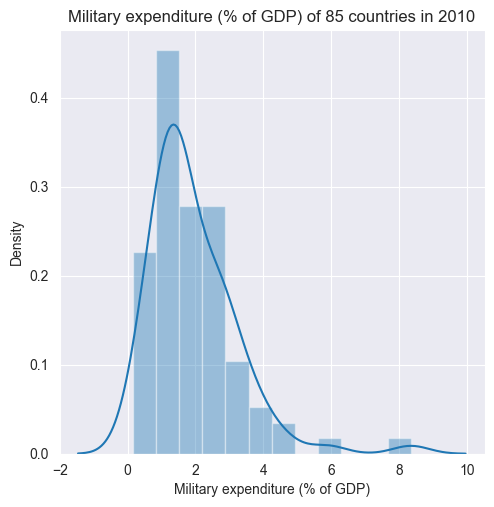

In [28]:
plt.figure(figsize=(5.5, 5.5))
g = sns.distplot(military_exp_np, norm_hist=False)
g.set_title('Military expenditure (% of GDP) of 85 countries in 2010');
plt.xlabel("Military expenditure (% of GDP)");

`En la grafica anterior se puede observar que el gasto militar en el 2010 de la mayoría de paises incluidos es de menos del 4%. No obstante, un pequeño grupo de paises llegan a invertir en gastos militares hasta el 8% del PIB.`

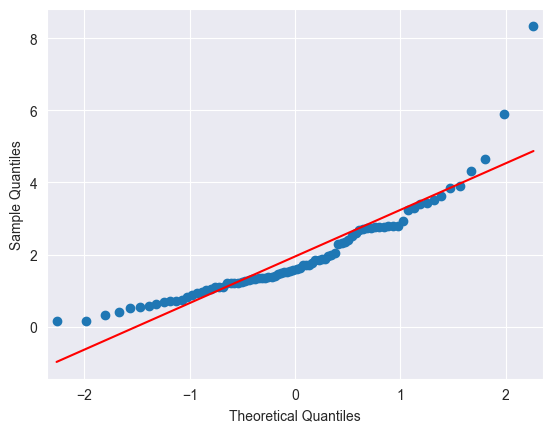

In [20]:
from statsmodels.graphics.gofplots import qqplot

qqplot(military_exp_np, line='s');

`En esta grafica se ilustran los cuantiles de la muestra en función a los quantiles teoricos de una variable con distribución  normal. Considerando que las variables con distribución normal tienden a concentrar sus datos cerca de la linea roja es posible afirmar que los datos son parcialmente normales ya que la mayoría de las observaciones se mantiene cerca de la linea roja. No obstante, tambien se observan valores desviados por lo cual resulta conveniente evaluar la normalidad con una prueba analitica`

**`Prueba de Shapiro-Wilk`**

- La prueba de `Shapiro-Wilk` evalúa una muestra de datos y cuantifica la probabilidad de que los datos procedan de una distribución gaussiana, en honor a `Samuel Shapiro` y `Martin Wilk`. En la práctica, se cree que la prueba de `Shapiro-Wilk` es una prueba fiable de normalidad, aunque hay algunos indicios de que la prueba puede ser adecuada para muestras de datos más pequeñas ($n < 30$), por ejemplo, miles de observaciones o menos. La función `shapiro() SciPy` calcula la prueba de `Shapiro-Wilk` (ver [Shapiro-Wilk test](https://es.wikipedia.org/wiki/Prueba_de_Shapiro%E2%80%93Wilk)) en un conjunto de datos determinado. La función devuelve tanto el estadístico $W$ calculado por la prueba como el $p$-value. A continuación se muestra el ejemplo completo de realización de la prueba de `Shapiro-Wilk` en el conjunto de datos.

$$
\begin{align*}
H_{0}&:\quad\textsf{La variable presenta una distribución normal}\\
H_{1}&:\quad\textsf{La variable presenta una distribución no normal}
\end{align*}
$$

In [29]:
from scipy.stats import shapiro

stat, p = shapiro(military_exp_np)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
 print('Sample looks Normal (fail to reject H0)')
else:
 print('Sample does not look Normal (reject H0)')

Statistics=0.857, p=0.000
Sample does not look Normal (reject H0)


`La prueba de shapiro-wilks rechazó HO = "Los datos son normales", por lo tanto no existe evidencia estadistica que respalde que en efecto los datos siguen una distribución normal.`

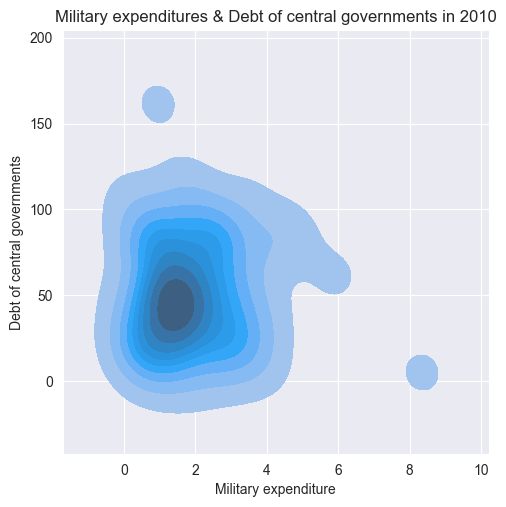

In [13]:
plt.figure(figsize=(5.5, 5.5))
g = sns.kdeplot(data_to_plot, x = "military_exp", y = "central_govt_debt", fill=True)
g.set_title('Military expenditures & Debt of central governments in 2010');
plt.xlabel("Military expenditure");
plt.ylabel("Debt of central governments");

`En esta visualización bidimensional se puede observar las densidades de las observaciones. Especificamente, es posible apreciar que la mayoría  de paises durante el 2010 tendieron a invertir alrededor del 2% del PIB en gastos militares y a tener una deuda cercana a 50 millones de dolares.`

## Datos de series temporales

- El ejemplo de datos transversales comentado anteriormente corresponde únicamente al año 2010. Sin embargo, en cambio, si consideramos un solo país, por ejemplo Estados Unidos, y echamos un vistazo a sus `Gastos militares y Deuda del gobierno central durante un periodo de 10 años, de 2001 a 2010`, obtendríamos dos series temporales: una sobre los gastos militares y otra sobre la deuda del gobierno federal estadounidense. Por lo tanto, en esencia, `una serie temporal se compone de observaciones cuantitativas sobre una o más características medibles de una entidad individual y tomadas en múltiples puntos en el tiempo`. 

- En este caso, los datos representan el `Gasto militar anual y la Deuda pública de Estados Unidos`. Los datos de series temporales suelen caracterizarse por varias estructuras internas interesantes, como la `tendencia`, la `estacionalidad`, `estacionariedad`, `autocorrelación`, etc. Las estructuras internas de los datos de series temporales requieren una formulación y técnicas especiales para su análisis. Estas técnicas se tratarán en los siguientes capítulos con estudios de casos e implementación de código de trabajo en `Python`.

- Para generar los gráficos anteriores usaremos el código que se desarrolló para obtener los gráficos para los datos transversales. `Comenzaremos creando dos nuevas series para representar las series temporales de gastos militares y deuda del gobierno central de los Estados Unidos desde 1960 hasta 2010`

In [30]:
central_govt_debt_us = central_govt_debt.loc[central_govt_debt['Country Code']=='USA', :].T
military_exp_us = military_exp.loc[military_exp['Country Code']=='USA', :].T

- Los dos objetos `Series` creados en el código anterior se fusionan para formar un único `DataFrame` y se cortan para contener los datos de los años 2001 a 2010:

In [31]:
data_us = pd.concat((military_exp_us, central_govt_debt_us), axis=1)
index0 = np.where(data_us.index=='1960')[0][0]
index1 = np.where(data_us.index=='2010')[0][0]
data_us = data_us.iloc[index0:index1+1,:]
data_us.columns = ['Federal Military Expenditure', 'Debt of Federal Government']
data_us.head()

,Federal Military Expenditure,Debt of Federal Government
1960,8.35266,NaN
1961,8.487129,NaN
1962,8.656586,NaN
1963,8.189007,NaN
1964,7.467629,NaN


- Detección de valores perdidos
Podemos utilizar los métodos isna() o isnull() para detectar los valores que faltan en los datos. Podemos obtener el total de valores perdidos en cada columna con sum()o tomar la media con mean().

In [16]:
data_us.isna().sum()

Federal Military Expenditure     0
Debt of Federal Government      29
dtype: int64

In [17]:
data_us.isnull().mean()*100

Federal Military Expenditure     0.000000
Debt of Federal Government      56.862745
dtype: float64

In [32]:
data_us['backward_fill'] = data_us['Debt of Federal Government'].bfill()
data_us.head()

,Federal Military Expenditure,Debt of Federal Government,backward_fill
1960,8.35266,NaN,39.016963
1961,8.487129,NaN,39.016963
1962,8.656586,NaN,39.016963
1963,8.189007,NaN,39.016963
1964,7.467629,NaN,39.016963


In [33]:
data_us['mean_fill'] = data_us['Debt of Federal Government'].mean()
data_us.head()

,Federal Military Expenditure,Debt of Federal Government,backward_fill,mean_fill
1960,8.35266,NaN,39.016963,51.155537
1961,8.487129,NaN,39.016963,51.155537
1962,8.656586,NaN,39.016963,51.155537
1963,8.189007,NaN,39.016963,51.155537
1964,7.467629,NaN,39.016963,51.155537


In [34]:
data_us['median_fill'] = data_us['Debt of Federal Government'].median()
data_us.head()

,Federal Military Expenditure,Debt of Federal Government,backward_fill,mean_fill,median_fill
1960,8.35266,NaN,39.016963,51.155537,47.659404
1961,8.487129,NaN,39.016963,51.155537,47.659404
1962,8.656586,NaN,39.016963,51.155537,47.659404
1963,8.189007,NaN,39.016963,51.155537,47.659404
1964,7.467629,NaN,39.016963,51.155537,47.659404


In [35]:
data_us['quadratic_fill'] = data_us['Debt of Federal Government'].interpolate(option='quadratic')
data_us.head()

,Federal Military Expenditure,Debt of Federal Government,backward_fill,mean_fill,median_fill,quadratic_fill
1960,8.35266,NaN,39.016963,51.155537,47.659404,NaN
1961,8.487129,NaN,39.016963,51.155537,47.659404,NaN
1962,8.656586,NaN,39.016963,51.155537,47.659404,NaN
1963,8.189007,NaN,39.016963,51.155537,47.659404,NaN
1964,7.467629,NaN,39.016963,51.155537,47.659404,NaN


- Existen otras técnicas de imputación de datos, tales como por ejemplo: [sklearn.impute.KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html), [sklearn.impute.IterativeImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer), [pandas.Series.interpolate](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html), etc,.... Notesé que la columna `quadratic_fill` mantiene los valores `NaN`. Esta técina ofrece las siguientes versiones de imputación: `'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'spline', 'barycentric', 'polynomial'` las cuales se le invita a revisar en la documentación. Realice para cada imputación un representación de su nueva distribución e identifique si esta se vió realmente afectada. 

- Dado que el cuadro anterior muestra que no se dispone solamente de datos sobre la deuda federal de varios años a partir de 1960, y se necesitan las dos dimensiones, otra opción es eliminar las filas con valores del `Dataframe data_us` antes de trazar la serie temporal

In [36]:
data_us.dropna(inplace=True)
print('Shape of data_us:', data_us.shape)

Shape of data_us: (22, 6)


In [37]:
data_us.head(10)

,Federal Military Expenditure,Debt of Federal Government,backward_fill,mean_fill,median_fill,quadratic_fill
1989,5.374717,39.016963,39.016963,51.155537,47.659404,39.016963
1990,5.120252,40.821367,40.821367,51.155537,47.659404,40.821367
1991,4.539845,43.948026,43.948026,51.155537,47.659404,43.948026
1992,4.666265,45.916542,45.916542,51.155537,47.659404,45.916542
1993,4.326925,48.104749,48.104749,51.155537,47.659404,48.104749
1994,3.941287,47.21406,47.214060,51.155537,47.659404,47.21406
1995,3.638489,47.059783,47.059783,51.155537,47.659404,47.059783
1996,3.350744,46.585511,46.585511,51.155537,47.659404,46.585511
1997,3.209903,43.958801,43.958801,51.155537,47.659404,43.958801
1998,3.017636,41.009914,41.009914,51.155537,47.659404,41.009914


- Por último, las series temporales se generan ejecutando el siguiente código:

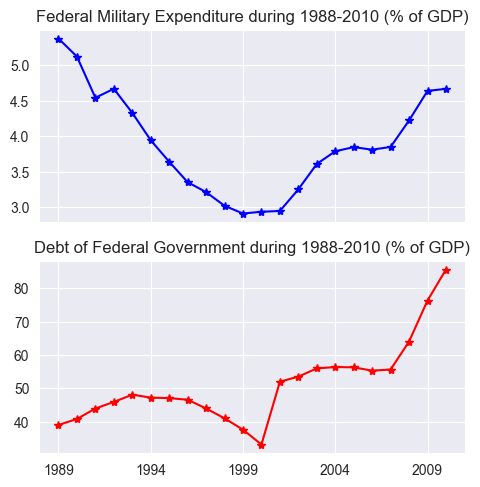

In [38]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(5.5, 5.5)
axarr[0].set_title('Federal Military Expenditure during 1988-2010 (% of GDP)')
data_us['Federal Military Expenditure'].plot(linestyle='-', marker='*', color='b', ax=axarr[0])
axarr[1].set_title('Debt of Federal Government during 1988-2010 (% of GDP)')
data_us['Debt of Federal Government'].plot(linestyle='-', marker='*', color='r', ax=axarr[1]);

`En la visualización anterior de la inversión en gastos militares y la deuda federal desde 1989 hasta 2009 se puede observar que cerca del año 2000 fue el periodo en el que estos valores se tornaron más bajos. Lo cual indica que los paises que inviertieron poco en la guerra tuvieron menos deudas.`

## Datos de panel

- Hasta ahora, hemos visto datos tomados de múltiples individuos pero en un punto en el tiempo (`transversales`) o tomados de una entidad individual pero a lo largo de múltiples puntos en el tiempo (`series temporales`). Sin embargo, `si observamos múltiples entidades a lo largo de múltiples puntos en el tiempo obtenemos un panel de datos también conocidos como datos longitudinales`. Ampliando nuestro ejemplo anterior sobre el gasto militar, consideremos ahora cuatro países durante el mismo periodo de 1960-2010. Los datos resultantes serán un conjunto de datos de panel.

- Preparemos los datos necesarios para trazar la figura correspondiente. Seguiremos el código que hemos utilizado para los datos transversales y de series temporales en este capítulo. Empezaremos creando un `DataFrame con los datos de las cuatro empresas mencionadas en el gráfico anterior`. Esto se hace de la siguiente manera:

In [39]:
chn = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)') & \
               (data['Country Code']=='CHN'), :].drop(data.columns[range(3)], axis=1) #China
chn = pd.Series(data=chn.values[0], index=chn.columns)
chn.dropna(inplace=True)
chn.head()

Indicator Code    MS.MIL.XPND.GD.ZS
1989                       2.499185
1990                       2.555996
1991                       2.407892
1992                       2.518629
dtype: object

In [40]:
usa = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)') & \
               (data['Country Code']=='USA'), :].drop(data.columns[range(3)], axis=1) #USA
usa = pd.Series(data=usa.values[0], index=usa.columns)
usa.dropna(inplace=True)
usa.head()

Indicator Code    MS.MIL.XPND.GD.ZS
1960                        8.35266
1961                       8.487129
1962                       8.656586
1963                       8.189007
dtype: object

In [41]:
ind = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)') & \
               (data['Country Code']=='IND'), :].drop(data.columns[range(3)], axis=1) #India
ind = pd.Series(data=ind.values[0], index=ind.columns)
ind.dropna(inplace=True)
ind.head()

Indicator Code    MS.MIL.XPND.GD.ZS
1960                       1.866015
1961                       1.933365
1962                       2.561202
1963                       3.758057
dtype: object

In [42]:
gbr = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)') & \
               (data['Country Code']=='GBR'), :].drop(data.columns[range(3)], axis=1) #United Kingdom
gbr = pd.Series(data=gbr.values[0], index=gbr.columns)
gbr.dropna(inplace=True)
gbr.head()

Indicator Code    MS.MIL.XPND.GD.ZS
1960                       6.343041
1961                       6.190022
1962                       6.210394
1963                       6.082126
dtype: object

In [43]:
n_years = chn.shape[0]

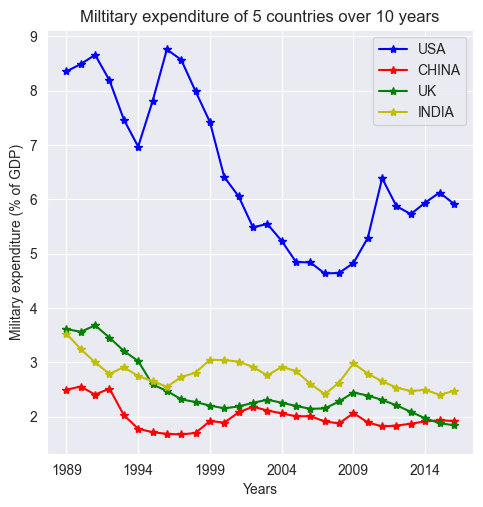

In [44]:
plt.figure(figsize=(5.5, 5.5))
usa[1:n_years].plot(linestyle='-', marker='*', color='b')
chn[1:n_years].plot(linestyle='-', marker='*', color='r')
gbr[n_years+1:2*n_years].plot(linestyle='-', marker='*', color='g')
ind[n_years+1:2*n_years].plot(linestyle='-', marker='*', color='y')
plt.legend(['USA','CHINA','UK','INDIA'], loc=1)
plt.title('Miltitary expenditure of 5 countries over 10 years')
plt.ylabel('Military expenditure (% of GDP)')
plt.xlabel('Years');

`En esta figura se grafica el gasto militar de USA, China, UK e India en el periodo 1989-2014. Las tendencias muestran que USA es un pais que independientemente de la decada ha invertido mucho más dinero en las fuerzas militares en comparación con sus homólogos. Asimismo, se puede apreciar que estas series temporales presentan estacionalidad.`

## Estructuras internas de las series temporales

- En esta sección, explicaremos conceptualmente las siguientes características especiales de los datos de series temporales que requieren un tratamiento matemático especial

    - **`Tendencia general`**
    - **`Estacionalidad`**
    - **`Movimientos cíclicos`**
    - **`Variaciones inesperadas`**

- La mayoría de las series temporales presentan una o varias de las estructuras internas mencionadas. Basándose en esta noción, una serie temporal puede expresarse como 

    $$
    \\[1mm]
    y_{t}=f_{t}+s_{t}+c_{t}+e_{t},
    $$
    
    que es una suma de los componentes de `tendencia, componentes estacionales, cíclicas e irregulares` en ese orden. Aquí, $t$ es el índice temporal en el que observaciones sobre la serie se han tomado en $t = 1,2,3,\dots,N$ puntos sucesivos e igualmente espaciados en el tiempo.

- El objetivo del análisis de series temporales es `descomponer una serie temporal en sus características constitutivas y desarrollar modelos matemáticos para ellas`. Estos modelos se utilizan para comprender las causas del comportamiento observado de la serie temporal y predecirla para momentos futuros.

## Tendencia general

- Cuando una serie temporal presenta un `movimiento ascendente o descendente a largo plazo, se dice que tiene tendencia general`. Una forma rápida de comprobar la presencia de una tendencia general es trazar la serie temporal como en la siguiente figura, que muestra las concentraciones de CO2 en el aire medidas durante 1974 hasta 1987

In [45]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [47]:
data = pd.read_excel('datasets/Monthly_CO2_Concentrations.xlsx', converters={'Year': np.int32, 'Month': np.int32})

In [32]:
data.head()

,CO2,Year,Month
0,333.13,1974,5
1,332.09,1974,6
2,331.10,1974,7
3,329.14,1974,8
4,327.36,1974,9


- Creamos índice de filas del `DataFrame` utilizando las columnas `Year` y `Month`

In [48]:
data.index = data['Year'].astype(str) + '-' + data['Month'].astype(str).map(lambda x: '0'+x if len(x) == 1 else x)
data.head()

,CO2,Year,Month
1974-05,333.13,1974,5
1974-06,332.09,1974,6
1974-07,331.10,1974,7
1974-08,329.14,1974,8
1974-09,327.36,1974,9


In [49]:
data = data.loc[(~pd.isnull(data['CO2'])) & \
                (~pd.isnull(data['Year']))& \
                (~pd.isnull(data['Month']))]

In [50]:
data.sort_values(['Year', 'Month'], inplace=True)

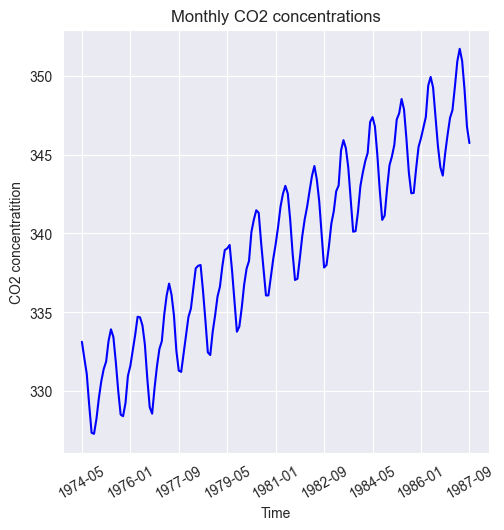

In [51]:
plt.figure(figsize=(5.5, 5.5))
data['CO2'].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30);

- Sin embargo, `la tendencia general puede no ser evidente a corto plazo`. Los efectos a corto plazo como las fluctuaciones estacionales y las variaciones irregulares hacen que las series temporales vuelvan a registrar valores más bajos o más altos observados en el pasado, por lo que pueden ocultar temporalmente cualquier tendencia general. Esto es evidente en la misma serie temporal de concentraciones de CO2 cuando se considera de 1979 a 1981, como se muestra en la siguiente figura. Por tanto, `para revelar la tendencia general, necesitamos una serie temporal que se remonte sustancialmente al pasado`.

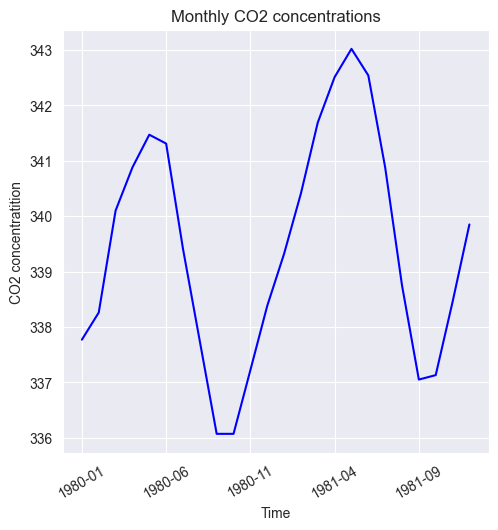

In [48]:
plt.figure(figsize=(5.5, 5.5))
data['CO2'].loc[(data['Year']==1980) | (data['Year']==1981)].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30);

- La tendencia general de la serie temporal se debe a cambios fundamentales o sistémicos del proceso o sistema que representa. Por ejemplo, el movimiento ascendente de las concentraciones de CO2 entre 1974 y 1987 puede atribuirse al aumento gradual de los automóviles y la industrialización durante esos años. `Una tendencia general se suele modelar estableciendo la serie temporal como una regresión frente al tiempo y otros factores conocidos como variables explicativas`. La regresión o línea de tendencia puede ser usada para la predicción del movimiento a largo plazo de la serie temporal. Los `residuos que deja la línea de tendencia se analizan en busca de otras propiedades interesantes, como la estacionalidad, el comportamiento cíclico y las variaciones irregulares`.

- A continuación, vamos a ajustar la línea de tendencia. Para ello importamos la clase `LinearRegression` de `scikit-learn` y ajustamos un modelo lineal al índice temporal. Para instalar la librería, utilice la orden

```shell
pip install -U scikit-learn
```

In [52]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [53]:
trend_model = LinearRegression(fit_intercept=True)
trend_model.fit(np.arange(data.shape[0]).reshape((-1,1)), data['CO2'])

LinearRegression()

In [54]:
print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0], trend_model.intercept_))

Trend model coefficient=0.1209930124223602 and intercept=329.45310559006214


- El `residual` obtenido a partir del modelo de línea de tendencia se muestran en la siguiente figura, el cual `presenta un comportamiento estacional`, el cual se analizará en la siguiente sección. Los residuos se calculan y se representan mediante las siguientes líneas de código

In [55]:
residuals = np.array(data['CO2']) - trend_model.predict(np.arange(data.shape[0]).reshape((-1,1)))

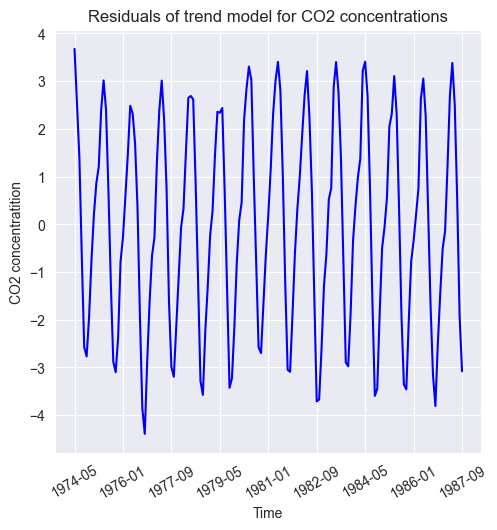

In [56]:
plt.figure(figsize=(5.5, 5.5))
pd.Series(data=residuals, index=data.index).plot(color='b')
plt.title('Residuals of trend model for CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30);

## Estacionalidad

- La estacionalidad se manifiesta como `variaciones repetitivas y periódicas en una serie temporal`. En la mayoría de los casos el análisis exploratorio de datos revela la presencia de estacionalidad. Volvamos a la serie temporal de las concentraciones de CO2. Aunque la serie tiene una media y una varianza constante, se aparta sistemáticamente del modelo de tendencia de forma predecible. `La estacionalidad se manifiesta en forma de desviaciones periódicas como las que se observan en las observaciones sin tendencia de las emisiones de CO2`. Picos y valles en el volumen mensual de ventas de productos estacionales como los regalos de Navidad o la ropa de temporada es otro ejemplo de serie temporal con estacionalidad.

- Una técnica práctica para determinar la estacionalidad es el análisis exploratorio de datos mediante los siguientes gráficos:
    - Gráfico de secuencia de series
    - Gráfico de subseries estacionales
    - Gráficos de cajas múltiples

## Gráfico de secuencia de ejecución

- Un simple gráfico de secuencia de ejecución de la serie temporal original con el tiempo en el eje $x$ y la variable en el eje $y$ sirve para indicar las siguientes propiedades de la serie temporal:
    - Movimientos en la media de la serie
    - Cambios en la varianza
    - Presencia de valores atípicos
    
- Por ejemplo el gráfico de la secuencia de ejecución de una serie temporal hipotética que se obtiene a partir de la formulación matemática 

    $$
    y_{t} = (At + B)\sin(t) + \varepsilon(t)
    $$
    
    con una media dependiente del tiempo y error $\varepsilon(t)$ que varía con una distribución normal $N(0, At + b)$. En casos como éste, un gráfico de secuencia de ejecución es una forma eficaz de identificar el desplazamiento de la media y la varianza de la serie, así como los valores atípicos. El gráfico de la serie temporal sin tendencia es un ejemplo de gráfico de secuencia.

## Gráfico de subserie estacional

- Para una periodicidad conocida de variaciones estacionales, las subseries estacionales vuelven a dibujar la serie original en lotes de períodos sucesivos. Por ejemplo, la periodicidad de las concentraciones de CO2 es de 12 meses y, basándose en ella, se traza una `subserie estacional de la media y la desviación estándar de los residuos`.

- `Para visualizar estacionalidad en los residuos, creamos medias y desviaciones estándar trimestrales`. Una subserie estacional revela dos propiedades:

    - Variaciones dentro de las estaciones como dentro de un lote de meses sucesivos.
    - Variaciones entre temporadas como entre lotes de meses sucesivos

- En primer lugar, tenemos que `añadir los residuos y las etiquetas trimestrales al DataFrame de concentraciones de CO2` de la siguiente forma

In [57]:
data['Residuals'] = residuals
month_quarter_map = {1: 'Q1', 2: 'Q1', 3: 'Q1',
                     4: 'Q2', 5: 'Q2', 6: 'Q2',
                     7: 'Q3', 8: 'Q3', 9: 'Q3',
                     10: 'Q4', 11: 'Q4', 12: 'Q4'}
data['Quarter'] = data['Month'].map(lambda m: month_quarter_map.get(m))

- A continuación, `se calculan la media estacional y las desviaciones típicas agrupando los datos por Year y Quarter`. Esto crea el nuevo `DataFrame` como `seasonal_sub_series_data`, que tiene la media trimestral y las desviaciones estándar a lo largo de los años. Estas columnas se renombran como sigue:

In [58]:
seasonal_sub_series_data = data.groupby(by=['Year', 'Quarter'])['Residuals'].aggregate([np.mean, np.std])
seasonal_sub_series_data.columns = ['Quarterly Mean', 'Quarterly Standard Deviation']

- Creamos índices de filas de `seasonal_sub_series_data` utilizando `Year & Quarter`

In [59]:
seasonal_sub_series_data.reset_index(inplace=True)
seasonal_sub_series_data.index = seasonal_sub_series_data['Year'].astype(str) + '-' + seasonal_sub_series_data['Quarter']
seasonal_sub_series_data.head()

,Year,Quarter,Quarterly Mean,Quarterly Standard Deviation
1974-Q2,1974,Q2,3.096398,0.820946
1974-Q3,1974,Q3,-0.616085,1.991671
1974-Q4,1974,Q4,-1.822397,1.014952
1975-Q1,1975,Q1,0.754624,0.511890
1975-Q2,1975,Q2,2.604978,0.355093


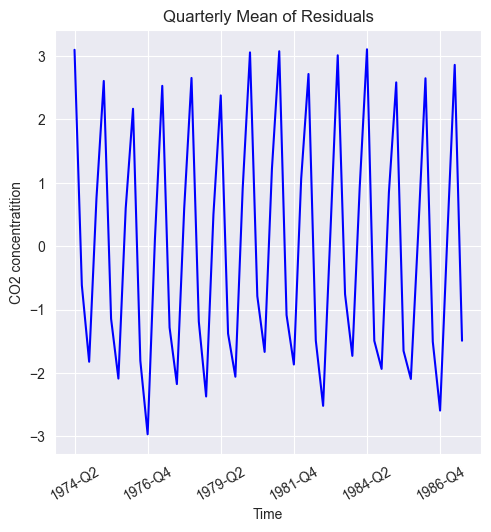

In [60]:
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Mean'].plot(color='b')
plt.title('Quarterly Mean of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30);

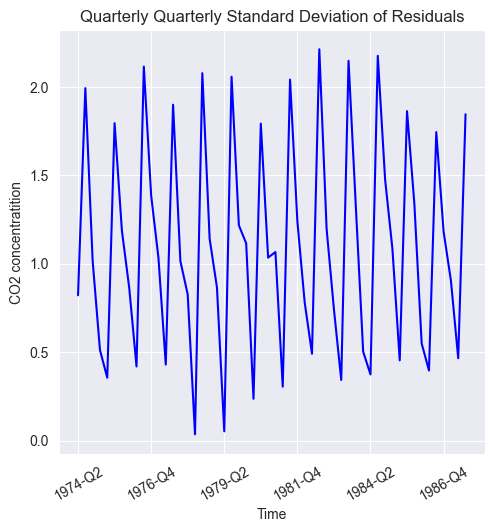

In [58]:
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Standard Deviation'].plot(color='b')
plt.title('Quarterly Quarterly Standard Deviation of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30);

## Gráficos de cajas múltiples

- El gráfico de la subserie estacional puede ser más informativo si se redibuja con `gráficos de caja estacionales` como se muestra en la siguiente figura. Un gráfico de cajas muestra tanto la `tendencia central` como la `dispersión de los datos` estacionales en un lote de unidades temporales. Además, la `separación entre dos gráficos de caja adyacentes revela las variaciones dentro de la temporada`

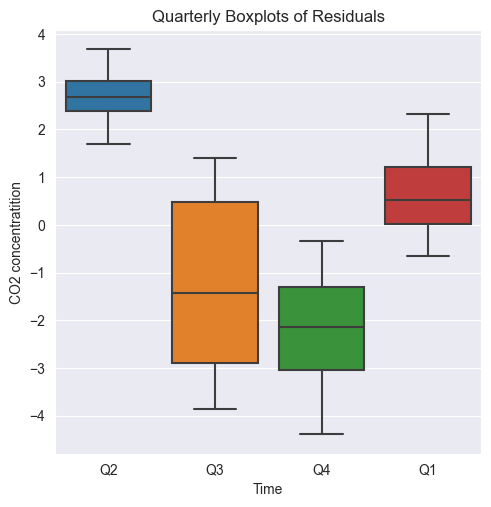

In [59]:
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data=data, y='Residuals', x='Quarter')
g.set_title('Quarterly Boxplots of Residuals')
g.set_xlabel('Time')
g.set_ylabel('CO2 concentratition');

## Cambios cíclicos

- Los cambios cíclicos son `movimientos que se observan cada pocas unidades de tiempo, pero ocurren con menos frecuencia que las fluctuaciones estacionales`. A diferencia de la estacionalidad, los `cambios cíclicos pueden no tener un periodo fijo de variaciones`. Además, la periodicidad media de los cambios cíclicos sería mayor (normalmente en años), mientras que las variaciones estacionales se observan dentro de un mismo año y corresponden a divisiones anuales del tiempo como estaciones, trimestres y periodos de festividades y vacaciones, etc.

- Se requiere un `gráfico a largo plazo de la serie temporal para identificar los cambios cíclicos` que pueden producirse, por ejemplo, cada pocos años y que se manifiestan como máximos y mínimos repetitivos. En este sentido, las `series temporales relacionadas con la economía y la empresa suelen mostrar cambios cíclicos que se corresponden con ciclos empresariales y macroeconómicos habituales`, como periodos de recesión seguidos de cada auge, pero están separados por pocos años de intervalo temporal. 

- Al igual que ocurre con las tendencias generales, `identificar los movimientos cíclicos puede requerir datos que se remontan significativamente en el pasado`. La siguiente figura ilustra los cambios cíclicos que se producen en la `Inflación del índice de precios al consumo (IPC) de la India y Estados Unidos`, en el periodo comprendido entre 1960 y 2016. Ambos países muestran patrones cíclicos en la inflación del IPC, que es aproximadamente durante un período de 2-2.5 años. Además, `la inflación del IPC de la India presenta mayores variaciones antes de 1990 que después de 1990`.

- Los datos de la siguiente figura se han descargado de `http://datamarket.com`, que mantiene datos sobre series temporales de una gran variedad de temas. El código escrito para generar la figura es el siguiente

In [61]:
inflation = pd.read_excel('datasets/inflation-consumer-prices-annual.xlsx', parse_dates=['Year'])

In [61]:
inflation.head()

,Year,India,United States
0,1960-01-01,1.783265,1.509929
1,1961-01-01,1.752022,1.075182
2,1962-01-01,3.576159,1.116071
3,1963-01-01,2.941176,1.214128
4,1964-01-01,13.354037,1.308615


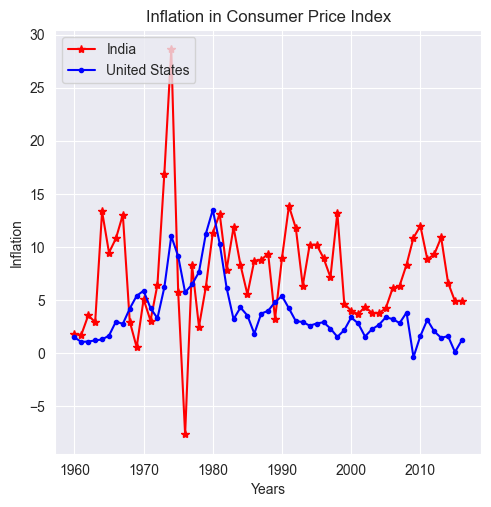

In [62]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(1960,2017), inflation['India'], linestyle='-', marker='*', color='r')
plt.plot(range(1960,2017), inflation['United States'], linestyle='-', marker='.', color='b')
plt.legend(['India','United States'], loc=2)
plt.title('Inflation in Consumer Price Index')
plt.ylabel('Inflation')
plt.xlabel('Years');

## Variaciones inesperadas

- Con respecto a nuestro modelo, que expresa una serie temporal como una suma de cuatro componentes, cabe señalar que, a pesar de poder tener en cuenta los otros tres componentes, es posible que se produzcan variaciones inesperadas. A pesar de poder tener en cuenta los otros tres componentes, es posible que nos quedemos con un `componente de error irreducible que es aleatorio y que no muestra una dependencia sistemática del índice temporal`.

- Este cuarto componente refleja `variaciones inesperadas` en la serie temporal. Las `variaciones inesperadas son estocásticas y no pueden enmarcarse en un modelo matemático para una predicción futura definitiva`. Este tipo de error se debe a la `falta de información sobre variables explicativas que puedan modelar estas variaciones o por la presencia de un ruido aleatorio`.

## Modelos de análisis de series temporales

- El objetivo del análisis de series temporales es `desarrollar un modelo matemático que pueda explicar el comportamiento observado de una serie temporal y, posiblemente, predecir su estado futuro`. El modelo elegido debe ser capaz de dar cuenta de una o más de las estructuras internas que pueden estar presentes. Con este fin, daremos una visión general de los siguientes modelos que se utilizan a menudo como componentes básicos del análisis de series temporales:

    - Modelos de media cero
    - Recorrido aleatorio
    - Modelos de tendencia
    - Modelos de estacionalidad

## Modelos de media cero

- Los modelos de media cero `tienen una media y una varianza constantes y no muestran tendencias predecibles ni estacionalidad`. Se supone que las observaciones de un modelo de media cero son independientes e idénticamente distribuidas (iid) y representan el ruido aleatorio en torno a una media fija, que se ha deducido de la serie temporal como un término constante. Consideremos que $Y_{1}, Y_{2},\dots, Y_{n}$ representan las variables aleatorias correspondientes a $n$ observaciones de un modelo de media cero. Si $y_{1}, y_{2},\dots, y_{n}$ son $n$ observaciones de la serie temporal de media cero, la distribución conjunta de las observaciones viene dada por el producto de las funciones de masa de probabilidad para cada índice temporal.

$$
P(Y_{1}=y_{1}, Y_{2}=y_{2}, \dots, Y_{n}=y_{n})=f(Y_{1}=y_{1})f(Y_{2}=y_{2})\cdots f(Y_{n}=y_{n}) 
$$

- Lo más habitual es modelar $f(Y_{t} = y_{t})$ mediante una distribución normal de media cero y varianza $\sigma^2$, que se supone que es el error irreducible del modelo y, por tanto, se trata como un ruido aleatorio. La siguiente figura muestra una serie de ruido aleatorio con media cero y distribución normal de varianza unitaria

In [63]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [64]:
zero_mean_series = np.random.normal(loc=0.0, scale=1., size=100)

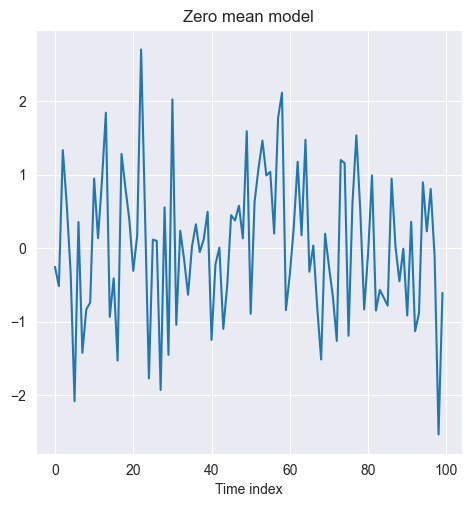

In [65]:
plt.figure(figsize=(5.5, 5.5))
g = sns.lineplot(zero_mean_series)
g.set_title('Zero mean model')
g.set_xlabel('Time index');

- `La media cero con varianza constante representa un ruido aleatorio que puede asumir infinitos posibles valores reales y es adecuado para representar variaciones irregulares en la serie temporal de una variable continua`. Sin embargo, en muchos casos, el estado observable del sistema o proceso puede ser de naturaleza discreta y limitarse a un número finito de valores posibles $s_{1}, s_{2}, \dots, s_{m}$. En tales casos, se supone que la variable observada $X$ obedece a la distribución multinomial, $P(X = s_{1}) = p_{1}, P(X = s_{2}) = p_{2}, \dots, P(X = s_{m}) = p_{m}$ tal que $p_{1} + p_{2} + \cdots + p_{m} = 1$. Una serie temporal de este tipo es un `proceso estocástico discreto`.

- El lanzamiento múltiple de un dado a lo largo del tiempo es un ejemplo de proceso estocástico discreto con seis resultados posibles para cada lanzamiento. Un proceso estocástico discreto más sencillo es un proceso binario como lanzar una moneda con sólo dos resultados: cara y cruz.

## Recorrido aleatorio

- Un paseo aleatorio viene dado como una `suma de` $n$ `iids, que tiene media cero y varianza constante`. A partir de esta definición, la realización de un paseo aleatorio en el índice de tiempo $t$ viene dada por la suma $S = y_{1} + y_{2} + \cdots + y_{n}$. La siguiente figura muestra el paseo aleatorio obtenido a partir de las *iids*, que varían según una distribución normal de media cero y varianza unitaria.

- El paseo aleatorio es importante porque si se encuentra un comportamiento de este tipo en una serie temporal, `se puede fácilmente reducir a un modelo de media cero tomando las diferencias de las observaciones de dos índices temporales consecutivos como` $S_{t}-S_{t-1} = y_{t}$ obteniendo así una serie iid con media cero y varianza constante. El paseo aleatorio puede generarse tomando la suma acumulada del modelo de media cero discutido en la sección anterior. El siguiente código lo implementa

In [66]:
random_walk = np.cumsum(zero_mean_series)

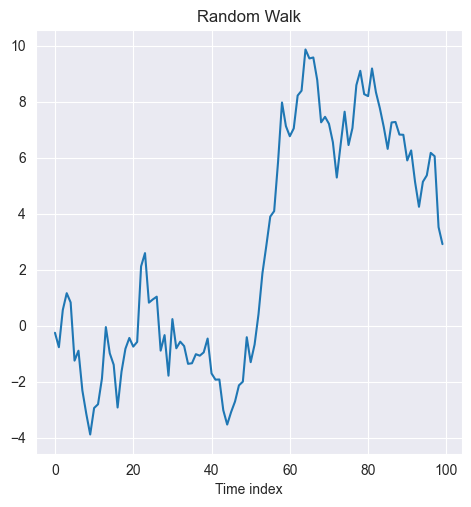

In [67]:
plt.figure(figsize=(5.5, 5.5))
g = sns.lineplot(random_walk)
g.set_title('Random Walk')
g.set_xlabel('Time index');

## Modelos de tendencia

- Este tipo de modelo pretende `captar la tendencia a largo plazo de la serie temporal que puede ajustarse como regresión lineal del índice temporal`. Cuando la serie temporal no presenta fluctuaciones periódicas o estacionales, puede expresarse simplemente como la suma de la tendencia y la media nula como $y_{t} = \mu(t) + x_{t}$, donde $\mu(t)$ es la tendencia a largo plazo dependiente del tiempo de la serie.

- La elección del modelo de tendencia $\mu(t)$ es fundamental para captar correctamente el comportamiento de la serie temporal. El análisis exploratorio de datos suele proporcionar pistas para plantear la hipótesis de si el modelo debería ser lineal o no lineal en $t$. Un modelo lineal es simplemente $\mu(t) = wt + b$, mientras que un modelo cuadrático es $\mu(t) = w_{1}t + w_{2}t^{2} + b$. A veces, la tendencia se puede hipotetizar mediante una relación compleja en términos del índice temporal, como $\mu(t) = w_{0}t^{p} + b$.

- Los pesos y sesgos en los modos de tendencia como los discutidos anteriormente se obtienen ejecutando una regresión con $t$ como variable explicativa y $\mu$ como explicada. Los residuos $y_{t} - \mu(t)$ del modelo de tendencia es considerado el ruido irreducible y como realización del componente de media cero $y_{t}$.

## Modelos de estacionalidad

- La estacionalidad se manifiesta como `fluctuaciones periódicas y repetitivas en una serie temporal` y, por tanto, se modelan como una suma ponderada de ondas senoidales de periodicidad conocida. Suponiendo que la tendencia a largo plazo se ha eliminado mediante una línea de tendencia, el modelo de estacionalidad puede expresarse como $y_{t} = s_{t}+ x_{t}$, donde la variación estacional es

    $$
    \\[1mm]
    s_{t}=\sum_{k=1}^{L}(w_{k}\cos(\alpha t)+v_{k}\sin(\alpha t))+b,
    $$
    
    con periocidad $\alpha$.
    
- Los modelos de estacionalidad también se conocen como modelos de regresión armónica, ya que intentan ajustar la suma de múltiples ondas senoidales. `Los cuatro modelos descritos aquí son los componentes básicos de un modelo de series temporales completo`. Como ya se habrá dado cuenta, un modelo de suma cero representa el error irreducible del sistema y los otros tres modelos pretenden transformar una serie temporal dada en modelos de suma cero mediante transformaciones matemáticas adecuadas. `Para obtener previsiones en series temporales originales, se aplican las transformaciones inversas pertinentes`.

- `En las próximas secciones se detallarán los cuatro modelos aquí analizados`. Sin embargo, hemos llegado a un punto en el que podemos resumir el enfoque genérico de un análisis de series temporales en los siguientes cuatro pasos:

    - Visualizar los datos en distintas etapas del índice temporal para revelar las tendencias a largo plazo y las fluctuaciones estacionales.
    - Ajustar la línea de tendencia para captar tendencias a largo plazo y trazar los residuos para comprobar si hay estacionalidad o error irreducible
    - Ajuste de un modelo de regresión armónica para captar la estacionalidad
    - Trazar los residuos dejados por el modelo de estacionalidad para comprobar si hay error irreducible.

- Estos pasos suelen bastar para desarrollar modelos matemáticos para la mayoría de las series temporales. Los modelos individuales de tendencia y estacionalidad pueden ser sencillos o complejos, dependiendo de la serie temporal original y de la aplicación.

## Autocorrelación y autocorrelación parcial

- Tras aplicar las transformaciones matemáticas comentadas en el apartado anterior, a menudo nos encontramos con lo que se conoce como una `serie temporal estacionaria` (o `débilmente estacionaria`), que se caracteriza por una `media constante` $E(y_{t})$ y una `correlación que solo depende del desfase entre dos pasos temporales, pero independiente del valor del paso temporal, esto es, su distribución de probabilidad es completamente independiente del tiempo`. Este tipo de covarianza es la clave en el análisis de series temporales y se denomina autocovarianza o autocorrelación, cuando se normaliza en el intervalo de -1 a 1. 

- La autocorrelación refleja el grado de dependencia lineal entre la serie temporal en el índice $t$ y las series temporales de los índices $t-k$ o $t+k$. `Una autocorrelación positiva indica que los valores presentes y futuros de la serie temporal se mueven en la misma dirección, mientras que los valores negativos significan que los valores presentes y futuros se mueven en sentido contrario. Si la autocorrelación es cercana a cero, las dependencias temporales dentro de la serie pueden ser difíciles de encontrar`. Debido a esta propiedad, la autocorrelación es útil para predecir el estado futuro de una serie temporal a $h$ pasos por delante.

````{prf:definition}
:label: def_autocorr_func

- La `covarianza` entre $y_{t}$ y su valor en otro período de tiempo, digamos, $y_{t+k}$ se denomina `autocovarianza en el desfase (lag)` $k$ y se define como

$$
\gamma_{k}=\textsf{Cov}(y_{t}, y_{t+k})=\textsf{E}[(y_{t}-\mu)(y_{t+k}-\mu)].
$$

- La colección de los valores de $\gamma_{k}, k = 0, 1, 2,\dots$ se denomina `función de autocovarianza`. Tenga en cuenta que la autocovarianza en el lag $k = 0$ es solo la `varianza` de la serie temporal; es decir, $\gamma_{0}=\sigma_{y}^{2}$, que es constante para una serie de tiempo estacionaria.

- El `coeficiente de autocorrelación` en el lag $k$ para una serie temporal estacionaria es

$$
\rho_{k}=\frac{\textsf{E}[(y_{t}-\mu)(y_{t+k}-\mu)]}{\sqrt{\textsf{E}[(y_{t}-\mu)^2]\textsf{E}[(y_{t+k}-\mu)^{2}]}}=\frac{\textsf{Cov}(y_{t}, y_{t+k})}{\textsf{Var}(y_{t})}=\frac{\gamma_{k}}{\gamma_{0}}.
$$

- El conjunto de los valores de $\rho_{k}, k = 0, 1, 2, \dots$ se denomina `función de autocorrelación (ACF)`. Obsérvese que, por definición, $\rho_{0} = 1$. Además, la `ACF` es independiente de la escala de medición de la serie temporal, por lo que `es una cantidad adimensional`. Además, $\rho_{k} = \rho_{-k}$; es decir, la `ACF` es simétrica en torno a cero, por lo que solo es necesario calcular la mitad positiva (o negativa).

- Si una serie temporal tiene una media y una función de autocovarianza finitas, se dice que es `estacionaria de segundo orden (o débilmente estacionaria de orden 2)`. Si, además, la distribución de probabilidad conjunta de las observaciones en todo momento es `normal multivariante`, entonces eso sería suficiente para dar lugar a una serie temporal estrictamente estacionaria.

- Es necesario estimar la `autocovarianza` y los `ACF` a partir de una serie temporal de longitud finita, digamos, $y_{1}, y_{2}, \dots, y_{T}$. La estimación habitual de la función de autocovarianza es

    $$
    \\[1mm]
    c_{k}=\hat{\gamma}_{k}=\frac{1}{T}\sum_{t=1}^{T-k}(y_{t}-\overline{y})(y_{t+k}-\overline{y}),\quad k=1,2,\dots,K,
    $$
    
    y la `ACF` es estimada por la `función de autocorrelación muestral` (o `ACF muestral`)
    
    $$
    \\[1mm]
    r_{k}=\hat{\rho}_{k}=\frac{c_{k}}{c_{0}},\quad k=0,1,2,\dots,K.
    $$
````

````{admonition} Observación
:class: tip

- Una buena regla general es que `se necesitan al menos 50 observaciones` para obtener una estimación fiable de la `ACF`, y las autocorrelaciones de las muestras individuales deben calcularse hasta el retardo $K$, donde $K$ es aproximadamente $T/4$.

- A menudo tendremos que determinar si el coeficiente de autocorrelación en un determinado retardo es cero. Esto puede hacerse comparando el coeficiente de autocorrelación de la muestra en el retardo $k, r_{k}$, con su error estándar. Sí, suponemos de que las observaciones no están correlacionadas, es decir, $\rho_{k} = 0$ para todo $k$, entonces `la varianza del coeficiente de autocorrelación de la muestra` es (ver {cite}`bartlett1946theoretical`)

    $$
    \\[1mm]
    \textsf{Var}(r_{k})\cong\frac{1}{T},
    $$
    
    y error estándar es
    
    $$
    \textsf{se}(r_{k})\cong\frac{1}{\sqrt{T}}.
    $$
````

- Para abordar el cálculo de este error, `Bartlett` considera el `proceso estocástico discreto AR` $y_{t+1}=\phi y_{t}+\varepsilon_{t+1}$. Para este propósito, utiliza la siguiente expresión para la varianza aproximada del coeficiente de autocorrelación estimado de un proceso normal estacionario dada por

$$
\textsf{Var}(r_{k})\cong\frac{1}{T}\sum_{v=-\infty}^{\infty}(\rho_{v}^{2}+\rho_{v+k}\rho_{v-k}-4\rho_{k}\rho_{v}\rho_{v-k}+2\rho_{v}^{2}\rho_{k}^{2}).
$$ (error_variance_acf)

- Por ejemplo, si $\rho_{k}=\phi^{|k|},~(-1<\phi<1)$, es decir, la función de autocorrelación se reduce exponencialmente, entonces la Ecuación {eq}`error_variance_acf` se convierte en (**`verifíquelo a manera de ejercicio`**)

    
$$
\textsf{Var}(r_{k})\cong\frac{1}{T}\left(1+2\sum_{v=1}^{q}\rho_{v}^{2}\right),\quad k>q.
$$
    
- Bajo el supuesto de que los $\rho_{k}$ son todos cero más allá de un cierto retardo $k =q$, el error estándar de gran retardo se aproxima a la desviación estándar de $r_{k}$ para retardos adecuadamente grandes $(k > q)$. Entonces los errores estándar para las autocorrelaciones estimadas $r_{k}$ adoptan la forma simple

$$
\textsf{se}(r_{k})\approx\frac{1}{\sqrt{T}}.
$$

**`Experimentos numéricos`**

- La presencia de autocorrelación puede identificarse trazando los valores observados de la `función de autocorrelación (ACF)` de una serie temporal determinada. Este gráfico suele denominarse `ACF`. Ilustremos cómo el trazado de los valores observados de la `ACF` puede ayudar a detectar la presencia de autocorrelación. Para ello, trazaremos primero el valor diario del `Dow Jones Industrial Average (DJIA)` observado durante enero de 2016 a diciembre de 2016

In [68]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [68]:
djia_df = pd.read_excel('datasets/DJIA_Jan2016_Dec2016.xlsx')

In [69]:
djia_df.index = djia_df['Date']
djia_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2016-01-04,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
2016-01-05,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2016-01-06,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
2016-01-07,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
2016-01-08,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


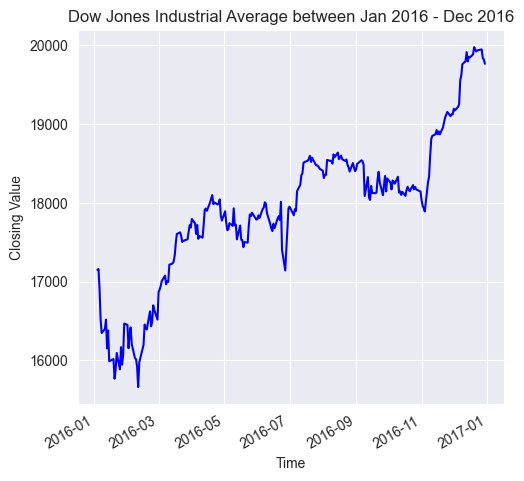

In [70]:
plt.figure(figsize=(5.5, 5.5))
djia_df['Close'].plot(color='b')
plt.title('Dow Jones Industrial Average between Jan 2016 - Dec 2016')
plt.xlabel('Time')
plt.ylabel('Closing Value');

- De la figura anterior se desprende que cuando el DJIA empieza a subir, continúa haciéndolo durante algún tiempo y viceversa. Sin embargo, debemos comprobarlo mediante un gráfico ACF. Utilizaremos `pandas` para leer los datos del fichero Excel y `seaborn` junto con `matplotlib` para visualizar las series temporales. A continuación, se estima la ACF calculando la autocorrelación para diferentes valores del retardo $h$, que en este caso varía de 0 a 100. La función `Pandas.Series.autocorr` se utiliza para calcular la autocorrelación para diferentes valores del retardo. El código es el siguiente siguiente:

In [72]:
lag = range(0,31)
djia_acf = []
for l in lag:
    djia_acf.append(djia_df['Close'].autocorr(l))

- El código anterior, itera sobre una lista de 100 valores del lag empezando de 0 a 30. Un desfase de 0 indica autocorrelación de una observación consigo misma (en otras palabras, autocorrelación) y por lo tanto, se espera que sea 1.0, como también se confirma en la figura siguiente. Autocorrelación en *DJIA Close* `parece disminuir linealmente con el retardo`, con un cambio aparente en la tasa de caída en torno a los 18 días. Con un desfase de 30 días, la ACF es ligeramente superior a 0.65.

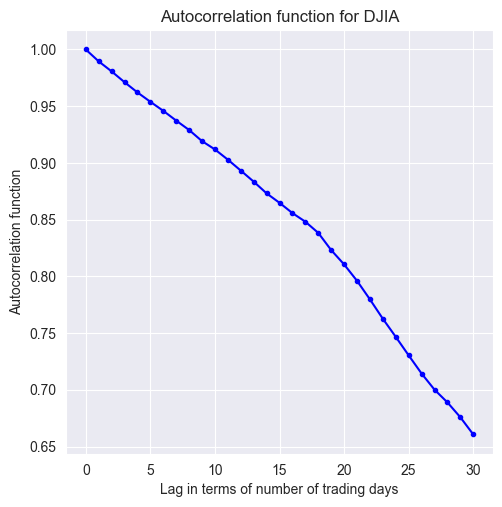

In [73]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(djia_acf, marker='.', color='b')
plt.title('Autocorrelation function for DJIA')
plt.xlabel('Lag in terms of number of trading days')
plt.ylabel('Autocorrelation function');

- El gráfico ACF muestra que la autocorrelación, en el caso de los valores de cierre del *DJIA*, tienen una `dependencia funcional del desfase temporal entre las observaciones`. Hemos escrito un bucle for para calcular la autocorrelación en distintos retardos y hemos representado los resultados mediante la función `sns.pointplot`. También se puede utilizar la función `plot_acf` de `statsmodels.graphics.tsaplots` para calcular y trazar la autocorrelación en varios rezagos. Además, esta función también traza los intervalos de confianza del 95%. `La autocorrelación fuera de estos intervalos de confianza es una correlación estadísticamente significativa, mientras que las que están dentro de los intervalos de confianza se deben a ruido aleatorio`. La autocorrelación y los intervalos de confianza generados por `plot_acf` se muestran en la figura siguiente:

<Figure size 550x550 with 0 Axes>

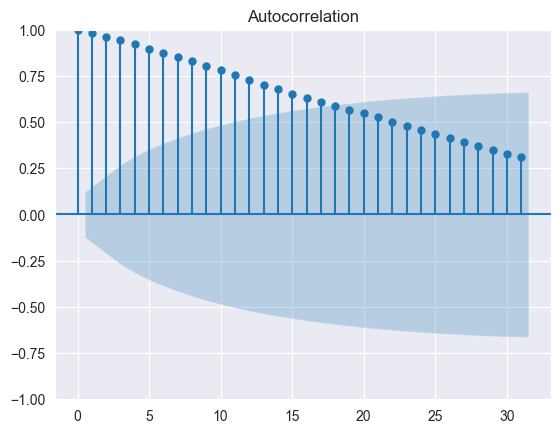

In [74]:
plt.figure(figsize=(5.5, 5.5))
plot_acf(djia_df['Close'], lags=31);

- Hasta ahora hemos hablado de la autocorrelación, que es una medida de la dependencia lineal entre las variables $y_{t}$ y $y_{t+h}$. Los `modelos autorregresivos (AR)` captan esta dependencia como una `regresión lineal` entre $y_{t+h}$ y $y_{t}$. Sin embargo, las series temporales tienden a llevar información y estructuras de dependencia por etapas, por lo que la autocorrelación en el retardo $h$ también se ve influida por las variables intermedias $y_t, y_{t+1}, \dots, y_{t+h-1}$. Por lo tanto, la autocorrelación no es la medida correcta de la correlación mutua entre $y_{t}$ y $y_{t+h}$ en presencia de las variables intermedias. 

- Sería erróneo elegir $h$ en modelos AR basados en autocorrelación. La `autocorrelación parcial` resuelve este problema midiendo la correlación entre $y_{t}$ y $y_{t+h}$ cuando se ha eliminado la influencia de las variables intermedias. Por lo tanto, `la autocorrelación parcial en el análisis de series temporales define la correlación entre` $y_{t}$ `y` $y_{t+h}$ `que no tiene en cuenta los retardos` $t+1, \dots, t+h-1$. La autocorrelación parcial ayuda a identificar el orden $h$ de un modelo $AR(h)$. Veamos la autocorrelación parcial de los valores de cierre del DJIA utilizando `plot_pacf` como sigue:

<Figure size 550x550 with 0 Axes>

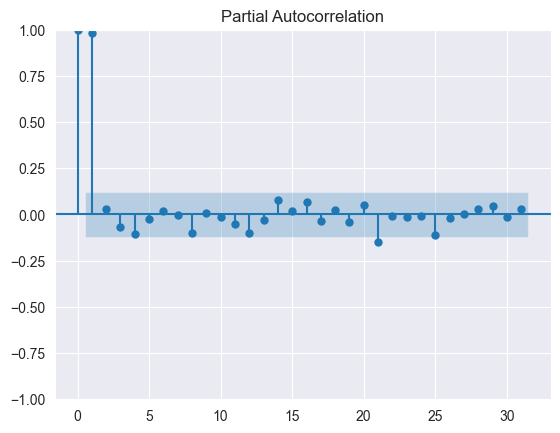

In [75]:
plt.figure(figsize=(5.5, 5.5))
plot_pacf(djia_df['Close'], lags=31);

- La primera autocorrelación parcial en el retardo cero es siempre 1.0. Como se observa en el gráfico anterior, la autocorrelación parcial sólo en el retardo uno es estadísticamente significativa, mientras que para el resto de los rezagos está dentro de los intervalos de confianza del 95%. Por lo tanto, para los valores de cierre del *DJIA* el orden de los modelos $AR$ es uno (usar $AR(1)$).

## Resumen

- En este capítulo hemos analizado varios tipos de datos, como los transversales, las series temporales y los datos de panel. Hemos profundizado en las propiedades especiales que hacen que los datos de series temporales sean especiales. Varios ejemplos y el código de trabajo en `Python` se han discutido para dar una comprensión de cómo se puede realizar el análisis exploratorio de datos en series temporales para visualizar sus propiedades.

- También hemos descrito la `autocorrelación` y la `autocorrelación parcial` y las técnicas gráficas para detectarlas en una serie temporal. Los temas discutidos en este capítulo nos dan el escenario para una discusión más detallada para trabajar con datos de series temporales en `Python`. En los proximos capítulos, se estudiará cómo leer tipos de datos más complejos en series temporales y utilizar dicha información para un análisis exploratorio de datos más profundo. 

- Volveremos sobre el concepto de `autocorrelación` en el contexto de la `estacionariedad de las series temporales`. Métodos estadísticos para detectar autocorrelación. También discutiremos la importancia de la estacionariedad y métodos de diferenciación y promediación para estacionalizar series temporales no estacionarias. Se analizan los modelos aditivo y multiplicativo de descomposición temporal para estimar la tendencia y la estacionalidad.

# Análisis de datos de series temporales

- Hemos abordado en el capítulo previo un enfoque general del análisis de series temporales que consta de dos pasos principales:

    - Visualización de los datos para comprobar la presencia de `tendencias, estacionalidad y patrones cíclicos`
    - Ajuste de la tendencia y la estacionalidad para generar series estacionarias

- La deducción de la tendencia, la estacionalidad y los componentes cíclicos nos dejaría con fluctuaciones irregulares que no se pueden modelar utilizando únicamente el índice temporal como variable explicativa. Por lo tanto, para mejorar aún más la previsión, las fluctuaciones irregulares se asumen como observaciones independientes e idénticamente distribuidas (iid) y se modelan mediante una regresión lineal sobre variables distintas del índice temporal.

- Los ajustes de tendencia y estacionalidad junto con un modelo sobre variables exógenas sería una mejor previsión para los casos futuros de la serie temporal. El cambio de la serie temporal original a observaciones `iid`, o en otras palabras, la estacionalización de una serie temporal, es un paso importante para el desarrollo modelos de regresión lineal sobre variables exógenas. Esto se debe a que existen `métodos estadísticos bien establecidos, por ejemplo teorema central del límite, el método de los mínimos cuadrados, etc., funcionan bien para las observaciones iid.`

- La metodología de análisis de series temporales descrita en los párrafos anteriores se resume en el siguiente diagrama de flujo. En este capítulo, cubriremos los pasos 1, 2 y 3 de esta metodología en los siguientes temas:

    - Procesamiento avanzado y visualización de los datos de las series temporales
    - Pruebas estadísticas de hipótesis para verificar la estacionariedad de una serie temporal
    - Descomposición de las series temporales para ajustar las tendencias y la estacionalidad

- Los conceptos matemáticos tratados en este capítulo son fundamentales para el desarrollo de modelos predictivos de series temporales.

```{figure} ./figures/fig1_chapter1.png
:name: fig1_chapter1
:align: center
:scale: 80
```

## Procesamiento avanzado y visualización de datos de series temporales

- En muchos casos, es necesario transformar las series temporales originales en estadísticas agregadas. Las estadísticas agregadas, como la media, la mediana y la varianza, se calculan para cada uno de los períodos de tiempo más largos.

- Otro ejemplo de preprocesamiento de datos para series temporales es el cálculo de agregados sobre segmentos similares de los datos. Consideremos las ventas mensuales de coches fabricados por la empresa $X$, donde los datos presentan una estacionalidad mensual, debido a la cual las ventas durante un mes de un año muestran patrones similares a las ventas del mismo mes en el año anterior y en el siguiente. 

- Para resaltar este tipo de estacionalidad debemos eliminar la tendencia a largo plazo de los datos. Sin embargo, supongamos que no existe una tendencia a largo plazo o que ésta ya ha sido ajustada. Estamos interesados en estimar las estadísticas estacionales (en este caso mensuales) para determinar las variaciones entre estaciones (entre meses).

- Por ejemplo, necesitamos el promedio de ventas durante enero, febrero, etc., para entender cómo varían las ventas de media a lo largo de un año determinado. Las tendencias estacionales, como las ventas de coches, pueden obtenerse agrupando primero la serie temporal original en 12 segmentos, cada uno de ellos definido por un mes, y luego agregando los datos de cada segmento.

- Obsérvese que tanto las operaciones de remuestreo como las de agrupación dividen la serie temporal original en trozos no para encontrar los agregados. Ambas técnicas van a reducir el ruido y posteriormente producirán un suavizado de la serie temporal original.

- Sin embargo, a veces se necesitan agregados continuos o corridos de las series temporales para análisis. La técnica de cálculo de agregados sobre ventanas de períodos de tiempo sucesivos da lugar a agregados móviles o rodantes. Por ejemplo, las medias móviles trimestrales de los datos de ventas de coches de automóviles sería hallar las medias a lo largo de una ventana de cuatro meses que se desplaza un mes cada vez. Al desplazar o hacer rodar la ventana de cálculo, se generan las medias móviles. 

- Las técnicas se demuestran con ejemplos en las tres sub-secciones siguientes:
    - Remuestreo de datos de series temporales
    - Realización de la agrupación
    - Cálculo de estadísticas móviles

- Utilizaremos la API de procesamiento de datos de `pandas` para implementar las técnicas

## Remuestreo de datos de series temporales

- La técnica de remuestreo se ilustra utilizando una serie temporal sobre concentraciones químicas tomadas cada dos horas entre el 1 de enero de 1975 y el 17 de enero de 1975. El conjunto de datos se ha descargado de http://datamarket.com.

- Comenzamos importando los paquetes necesarios para ejecutar este ejemplo:

In [76]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

- A continuación se leen los datos del archivo `CSV` en un `pandas.DataFrame` y mostramos las primeras filas del `DataFrame`

In [71]:
df = pd.read_csv('datasets/chemical-concentration-readings.csv')
print('Shape of the dataset:', df.shape)
df.head()

Shape of the dataset: (197, 2)


,Timestamp,Chemical conc.
0,1975-01-01 00:00:00,17.0
1,1975-01-01 02:00:00,16.6
2,1975-01-01 04:00:00,16.3
3,1975-01-01 06:00:00,16.1
4,1975-01-01 08:00:00,17.1


- Convertiremos las observaciones bimensuales de la serie temporal original en medias diarias aplicando las funciones de remuestreo y media en la segunda columna. La función de remuestreo requiere que los índices de fila del `DataFrame` sean `timestamp` de tipo `numpy.datetime64`.

- Por lo tanto, cambiamos los índices de fila de números enteros, como se muestra en la tabla anterior a `datetime_rowid` que es una `pandas.Series` de objetos `numpy.datetime64`. 

- Los objetos `numpy.datetime64` se generan a partir de la columna `Timestamp` utilizando la función de utilidad `pd.todatetime`. El siguiente código muestra cómo se realiza la reindexación por filas

In [72]:
datetime_rowid = df['Timestamp'].map(lambda t: pd.to_datetime(t, format='%Y-%m-%d %H:%M:%S'))
df.index = datetime_rowid
df.head()

,Timestamp,Chemical conc.
Timestamp,,
1975-01-01 00:00:00,1975-01-01 00:00:00,17.0
1975-01-01 02:00:00,1975-01-01 02:00:00,16.6
1975-01-01 04:00:00,1975-01-01 04:00:00,16.3
1975-01-01 06:00:00,1975-01-01 06:00:00,16.1
1975-01-01 08:00:00,1975-01-01 08:00:00,17.1


- Ahora estamos listos para aplicar las funciones de `resample` y `mean` en la columna `Chemical conc.`

In [73]:
daily = df['Chemical conc.'].resample('D')
daily_mean = daily.mean()

- Observe que hemos pasado el argumento `D` a la función `resample` para generar las medias diarias. Para los agregados mensuales y anuales, tenemos que pasar `M` e `Y` a la función `resample`. Por último, los promedios originales y diarios se representan en la siguiente figura, que muestra el efecto de suavización de esta última.

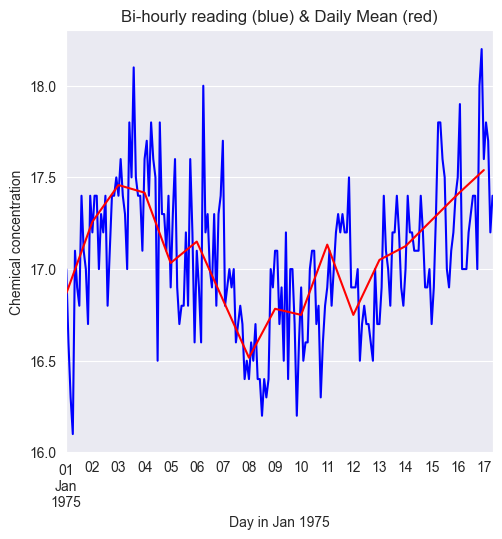

In [74]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
df['Chemical conc.'].plot(ax=ax, color='b')
daily_mean.plot(ax=ax, color='r')
ax.set_title('Bi-hourly reading (blue) & Daily Mean (red)');
ax.set_xlabel('Day in Jan 1975');
ax.set_ylabel('Chemical concentration');

## Agregación por grupos

- Para demostrar la agregación por grupos, utilizaremos la serie temporal de la temperatura media diaria del río Fisher en Texas, Estados Unidos. La serie temporal tiene observaciones tomadas entre el 1 de enero de 1988 y el 31 de diciembre de 1991. El conjunto de datos se ha descargado de http://datamarket.com. Comenzamos leyendo y trazando la serie temporal original de la siguiente manera

In [75]:
df = pd.read_csv('datasets/mean-daily-temperature-fisher-river.csv')
df.index = df['Date'].map(lambda d: pd.to_datetime(d, format = '%Y-%m-%d'))

In [82]:
print('Shape of dataframe:', df.shape)
df.head()

Shape of dataframe: (1461, 2)


,Date,Mean temperature
Date,,
1988-01-01,1988-01-01,-23.0
1988-01-02,1988-01-02,-20.5
1988-01-03,1988-01-03,-22.0
1988-01-04,1988-01-04,-30.5
1988-01-05,1988-01-05,-31.0


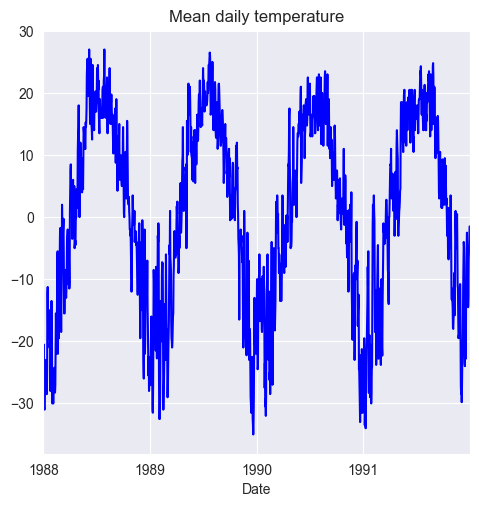

In [76]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
df['Mean temperature'].plot(ax=ax, color='b')
ax.set_title('Mean daily temperature');

- `La serie temporal original parece tener patrones mensuales que se repiten cada año y que pueden verificarse calculando los promedios mensuales. Esto se hace agrupando los datos en 12 meses y luego calculando los promedios de cada mes`. El código que hace esto se muestra en el siguiente fragmento. Comenzamos añadiendo una columna `Month_Year` al `DataFrame`

In [77]:
df['Month_Year'] = df.index.map(lambda d: d.strftime('%m-%Y'))
df.head()

,Date,Mean temperature,Month_Year
Date,,,
1988-01-01,1988-01-01,-23.0,01-1988
1988-01-02,1988-01-02,-20.5,01-1988
1988-01-03,1988-01-03,-22.0,01-1988
1988-01-04,1988-01-04,-30.5,01-1988
1988-01-05,1988-01-05,-31.0,01-1988


- A continuación, la columna `Mean temperature` se agrupa con respecto a la nueva columna columna `Month_Year` y se calculan la media, la mediana y las desviaciones estándar de cada mes

In [78]:
monthly_stats = df.groupby(by='Month_Year')['Mean temperature'].aggregate([np.mean, np.median, np.std])
monthly_stats.reset_index(inplace=True)
monthly_stats.head()

,Month_Year,mean,median,std
0,01-1988,-22.137097,-23.0,5.260640
1,01-1989,-17.129032,-18.0,8.250725
2,01-1990,-15.112903,-12.0,6.606764
3,01-1991,-23.038710,-24.5,7.095570
4,02-1988,-19.025862,-19.5,8.598522


- Tenga en cuenta que las filas de la tabla anterior no están en orden ascendente de `Month_Year`. Por lo tanto, es necesario registrarlo. Esto se hace creando dos nuevas columnas `Month` y `Year` y, a continuación, ordenando en orden ascendente `Year`, seguido de la ordenación en orden ascendente de `Month`

In [79]:
monthly_stats['Year'] = monthly_stats['Month_Year']\
.map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%Y'))

monthly_stats['Month'] = monthly_stats['Month_Year']\
.map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%m'))

monthly_stats.sort_values(by=['Year', 'Month'], inplace=True)
monthly_stats.head()

,Month_Year,mean,median,std,Year,Month
0,01-1988,-22.137097,-23.000,5.260640,1988,01
4,02-1988,-19.025862,-19.500,8.598522,1988,02
8,03-1988,-8.258065,-9.250,5.341459,1988,03
12,04-1988,2.641667,1.875,5.057720,1988,04
16,05-1988,11.290323,11.000,6.254364,1988,05


- Los agregados mensuales se representan en la siguiente figura, que pone de manifiesto la `estacionalidad mensual` existente en los datos originales.

In [80]:
monthly_stats.index = monthly_stats['Month_Year']

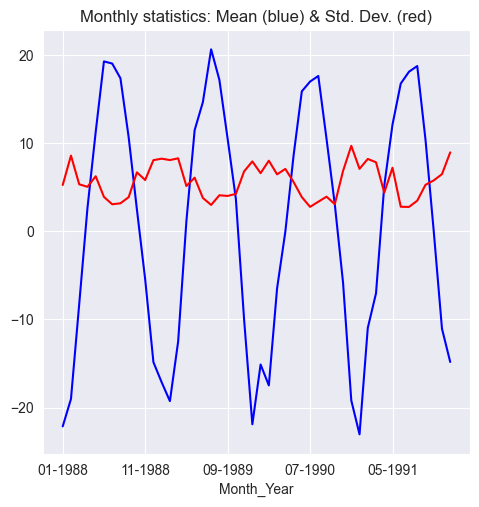

In [81]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)

monthly_stats['mean'].plot(ax=ax, color='b')
monthly_stats['std'].plot(ax=ax, color='r')

ax.set_title('Monthly statistics: Mean (blue) & Std. Dev. (red)');

## Estadísticas moviles

- En esta sección, seguiremos trabajando con el conjunto de datos de Fisher River. Las estadísticas móviles o rodantes se calculan deslizando una ventana de cierto tamaño sobre la serie temporal original y agregando los datos de cada ventana. Esto también se conoce como convolución sobre el índice temporal. 

- Los dos parámetros importantes de la operación de convolución son el tamaño de la ventana y la la longitud de paso. El primero define el número de unidades de tiempo que se toman como entrada a la función de agregación mientras que el segundo establece el intervalo a lo largo del índice de tiempo entre cada cálculo. 

- Por ejemplo, supongamos que se utiliza un tamaño de ventana de $k$ y un intervalo de longitud $l$ para calcular la función $f$ sobre una serie temporal $y_{1}, y_{2},\dots, y_{n}$ con $N$ observaciones. En este caso, el estadístico móvil se obtiene como $f(y_{1}, y_{2},\dots, y_{t}) , f(y_{1+l}, y_{2+l},\dots, y_{t+l})$, y así sucesivamente. 

- Obsérvese que cada vez se calcula la función desplazando la ventana temporal hacia la derecha en $l$ unidades de tiempo. La media móvil es un caso especial de la función $f$ y requiere simplemente promediar las observaciones en la ventana de tiempo.

- Vamos a demostrar cómo se pueden calcular las medias móviles en el conjunto de datos de Fisher River. Calcularemos las medias móviles semanales, fijando el tamaño de la ventana en siete y deslizando la ventana un lugar a la derecha

In [82]:
weekly_moving_average = df['Mean temperature'].rolling(7).mean()

In [83]:
monthly_moving_average = df['Mean temperature'].rolling(30).mean()

- La función `rolling` sólo toma como argumento el tamaño de la ventana. Por lo tanto, para añadir una longitud de paso de más de uno, seguimos calculando la media móvil como se ha mostrado anteriormente, pero cortamos la serie resultante para obtener el resultado deseado. Para las franjas de más de dos unidades de tiempo utilizamos el siguiente código

In [84]:
weekly_moving_average_2stride = df['Mean temperature'].rolling(7).mean()[::2]

In [85]:
monthly_moving_average_2stride = df['Mean temperature'].rolling(30).mean()[::2]

- En el análisis de series temporales, las estadísticas móviles basadas en la longitud de paso son las más comunes, por lo que rara vez se necesitará algo más que la función rolling. Los datos originales se representan
en la siguiente figura, que muestra la reducción del ruido y el consiguiente efecto de
y el consiguiente efecto de suavización producido por las medias móviles:

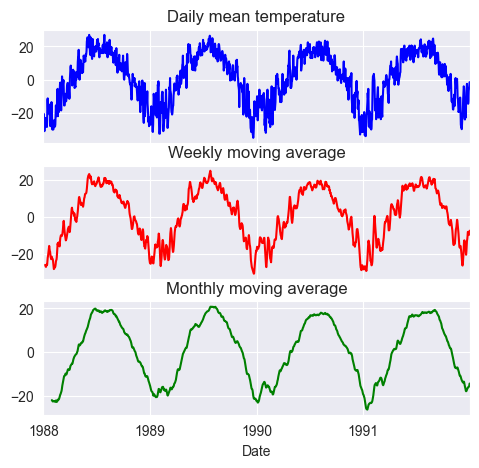

In [86]:
fig, axarr = plt.subplots(3, sharex=True)
fig.set_size_inches(5.5, 5,5)

df['Mean temperature'].plot(ax=axarr[0], color='b')
axarr[0].set_title('Daily mean temperature');

weekly_moving_average.plot(ax=axarr[1], color='r')
axarr[1].set_title('Weekly moving average');

monthly_moving_average.plot(ax=axarr[2], color='g')
axarr[2].set_title('Monthly moving average');

```{prf:theorem}
:label: th_moving_average

Una `media móvil simple` de longitud $N$ asigna ponderaciones $1/N$ a las observaciones más recientes $y_{T}, y_{T-1},\dots, y_{T-N+1}$, y peso cero a todas las demás observaciones. Si $M_{T}$ es la media móvil, la media móvil de $N$ intervalos en el período $T$ es

$$
M_{T}=\frac{y_{T}+y_{T-1}+\cdots+y_{T-N+1}}{N}=\frac{1}{N}\sum_{t=T-N+1}^{T}y_{t}
$$

Evidentemente, a medida que se dispone de cada nueva observación, ésta se añade a la suma a partir de la cual se calcula la media móvil y la observación más antigua se descarta (`rolling`). Si la varianza de una observación individual $y_{t}$ es $\sigma^{2}$, entonces, suponiendo que las observaciones no están correlacionadas, la varianza de la media móvil es

$$
\textsf{Var}(M_{T})=\frac{\sigma^{2}}{N}.
$$

A veces se utiliza una versión `"centrada"` de la media móvil, dada por

$$
M_{t}=\frac{1}{S+1}\sum_{i=-S}^{S}y_{t-i}
$$

donde el intervalo de la media móvil centrada es $N=2S+1$

```

**`Demostración`**

- Si la varianza de una observación individual $y_{t}$ es $\sigma^{2}$, entonces asumiendo que las observaciones no están correlacionadas, la varianza de la media móvil es

$$
\textsf{Var}\left(M_{T}\right)=\textsf{Var}\left(\frac{1}{N}\sum_{t=T-N+1}^{T}y_{t}\right)=\frac{1}{N^2}\sum_{t=T-N+1}^{T}\textsf{Var}(y_{t})=\frac{\sigma^2}{N}.
$$

````{admonition} Observación
:class: tip

- La `media móvil simple` es un `suavizador de datos lineal`, o un `filtro lineal`, porque sustituye cada observación $y_{t}$ por una combinación lineal de los otros puntos de datos que están cerca de él en el tiempo. Los pesos de la combinación lineal son iguales, por lo que la combinación lineal es una media.

- En algunos caso, podrían utilizarse pesos desiguales. Por ejemplo, el `filtro de Hanning` es una media móvil ponderada y centrada dada por

    $$
    \\[2mm]
    M_{t}^{H}=0.25 y_{t+1}+0.5y_{t}+0.25y_{t-1}.
    $$
    
    `Julius von Hann`, meteorólogo austriaco del siglo XIX, utilizó este filtro para suavizar datos meteorológicos. 
````

- Una desventaja obvia de un filtro lineal como una `media móvil` es que un `punto de datos inusual o erróneo o un valor atípico` dominará las medias móviles que contengan esa observación, contaminando las medias durante un periodo de tiempo igual al intervalo del filtro. Por ejemplo, consideremos la secuencia de observaciones

    $$
    \\[1mm]
    \{15, 18, 13, 12, 16, 14, 16, 17, 18, 15, 18, 200, 19, 14, 21, 24, 19, 25\}
    $$ (unusual_data_value)
    
    que aumenta de forma razonablemente constante de 15 a 25, excepto para el inusual valor 200.

- Cualquier versión suavizada razonable de los datos también debería aumentar de forma constante de 15 a 25 y no hacer hincapié en el valor 200. Ahora, incluso si 200 es una observación legítima, y no el resultado de un error de registro de datos (¡quizás debería ser 20!), es tan inusual que `merece una atención especial y probablemente no debería analizarse junto con el resto de los datos`.

```{prf:definition} Medianas moviles corridas
:label: moving_median

- Las medianas móviles impares (también denominadas `medianas móviles corridas`) son una alternativa a las medias móviles que suavizan eficazmente los datos cuando la serie puede estar contaminada con valores inusuales o valores atípicos. La mediana de intervalo $N$ se define como

    $$
    \\[1mm]
    m_{t}^{[N]}=\textsf{med}(y_{t-u},\dots,y_{t},\dots,\dots,y_{t+u}),
    $$
    
    donde $N=2u+1$. 
    
- La mediana es la observación intermedia en el orden de clasificación (u orden de valor). La `mediana móvil de span 3` es un suavizador de datos muy popular y eficaz, donde

    $$
    \\[1mm]
    m_{t}^{3}=\textsf{med}(y_{t-1}, y_{t}, y_{t+1}).
    $$
```

- Este suavizador procesaría los datos de tres en tres, y sustituiría las tres observaciones originales por su mediana. Si aplicamos este suavizador a los datos anteriores (ver datos {eq}`unusual_data_value`), obtenemos

$$
\{\underline{\hspace{9mm}},15, 13, 13, 14, 16, 17, 17, 18, 18, 19, 19, 19, 21, 21, 24, \underline{\hspace{9mm}}\}
$$

- Estos datos suavizados son una representación razonable de los datos originales, pero ignoran convenientemente el valor 200. `Los valores finales se pierden al utilizar la mediana móvil, y se representan con` "$\underline{\hspace{9mm}}$".

- En general, una mediana móvil pasará secuencias monótonas de datos sin cambios. Seguirá una función escalonada en los datos, pero eliminará un pico o una alteración más persistente en los datos que tenga una duración de como máximo $u$ observaciones consecutivas. Las medianas móviles pueden aplicarse más de una vez para obtener una serie de observaciones aún más suave. Por ejemplo, si se aplica la mediana móvil de longitud 3 a los datos suavizados anteriores resulta en

$$
\{\underline{\hspace{9mm}}, 13, 13, 14, 16, 17, 17, 18, 18, 19, 19, 19, 21, 21, \underline{\hspace{9mm}}\}
$$

- Estos datos son ahora tan suaves como se puede conseguir; es decir, la aplicación repetida de la mediana móvil no cambiará los datos, aparte de los valores finales. `Si hay muchas observaciones, la pérdida de información de los valores finales que faltan no es grave`. Sin embargo, si es necesario o deseable mantener las longitudes de los conjuntos de datos originales y suavizados, una forma sencilla de hacerlo es `"copiar" o volver a añadir los valores finales de los datos originales`. Esto daría como resultado los datos suavizados:

$$
\{\underline{\hspace{9mm}}, 15, 18, 13, 13, 14, 16, 17, 17, 18, 18, 19, 19, 19, 21, 21, 19, 25, \underline{\hspace{9mm}}\}
$$

- También existen métodos para suavizar los valores finales. {cite}`tukey1977exploratory` es una referencia básica sobre este tema y contiene muchas otras técnicas útiles para el análisis de datos.

## Procesos estacionarios

- Un supuesto importante en la teoría de la estimación estadística es que, para que los estadísticos muestrales sean fiables, la población no debe experimentar ningún cambio fundamental o sistémico en los individuos de la muestra o a lo largo del tiempo en el que se han recogido los datos. Este supuesto garantiza que los `estadísticos muestrales no se alteren y se mantengan para entidades que están fuera de la muestra utilizada para su estimación`.

- Este supuesto también se aplica al análisis de series temporales, de modo que `la media, la varianza y la autocorrelación` estimadas pueden utilizarse como una estimación razonable para futuras ocurrencias. En el análisis de series temporales, este supuesto se conoce como `estacionariedad`, que requiere que las `estructuras internas de la serie no cambien con el tiempo`. **Por lo tanto, estacionariedad requiere que la media, la varianza y la autocorrelación sean invariantes con respecto al tiempo real de observación**. Otra forma de entender la estacionariedad es que la serie tenga media y varianza constantes sin patrones predecibles y repetitivos.

```{prf:definition} Serie temporal estacionaria
:label: def_stationarity

- Una serie de tiempo se dice que es `estrictamente estacionaria` si sus propiedades no se ven afectadas por un cambio en el origen temporal. Es decir, si la distribución de probabilidad conjunta de las observaciones $y_{t}, y_{t+1}, y_{t+2}, \dots, y_{t+n}$ es exactamente igual a la distribución de las observaciones $y_{t+k}, y_{t+k+1}, y_{t+k+2}, \dots, y_{t+k+n}$ entonces la es estrictamente estacionaria. 

- Cuando $n = 0$, el supuesto de estacionariedad significa que la distribución de probabilidad de $y_{t}$ es la misma en todos los periodos de tiempo y puede escribirse como $f(y)$.

- Estacionarieda implica un tipo de `equilibrio estadístico o estabilidad` en los datos. En consecuencia, la serie temporal tiene una media constante definida de la forma habitual como

    $$
    \mu_{y}=\textsf{E}(y)=\int_{-\infty}^{\infty}yf(y)dy
    $$
    
    y una varianza constante definida como
    
    $$
    \\[1mm]
    \sigma_{y}^{2}=\textsf{Var}(y)=\int_{-\infty}^{\infty}(y-\mu_{y})^{2}f(y) dy.
    $$

- Para estimar estos parámetros se utilizan la `media y la varianza muestrales`. Si las observaciones de la serie temporal son $y_{1}, y_{2},\dots, y_{T}$, la media muestral es

    $$
    \overline{y}=\hat{\mu}_{y}=\frac{1}{T}\sum_{t=1}^{T}y_{t}
    $$
    
    y la varianza muestral es
    
    $$
    s^{2}=\hat{\sigma}_{y}^{2}=\frac{1}{T}\sum_{t=1}^{T}(y_{t}-\overline{y})^{2}.
    $$ (sample_variance_T)

- Obsérvese que el divisor en la Ecuación {eq}`sample_variance_T` es $T$ en lugar del más familiar $T-1$. Esta es la convención común en muchas aplicaciones de series temporales, como $T$ no suele ser pequeño, habrá poca diferencia entre utilizar $T$ en lugar de $T-1$.

```

- Un ejemplo popular de serie temporal estacionaria es la serie de media cero, que se genera a partir de puntos que se muestrean de una `distribución normal de media cero y varianza unitaria`. Aunque los puntos se muestrean secuencialmente de la distribución normal y se representan como una serie temporal, las observaciones individuales son independientes e idénticamente distribuidas (iid). La serie de media cero no muestra ningún patrón temporal, como la `tendencia, la estacionalidad y la autocorrelación`.

In [94]:
from random import seed
from pandas import Series
import random 
from pandas.plotting import autocorrelation_plot

- Usamos una semilla `seed` generadora de números aleatorios, y creamos una serie de ruido blanco

In [95]:
seed(1)
series = [random.gauss(0.0, 1.0) for i in range(1000)]
series = Series(series)
series.describe()

count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64

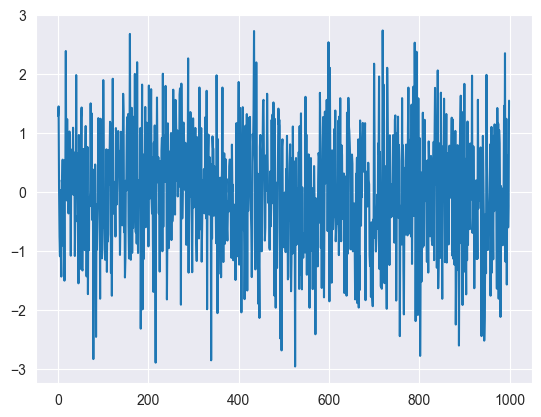

In [96]:
series.plot();

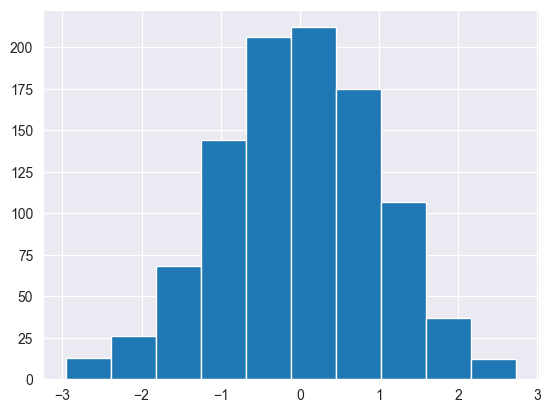

In [97]:
series.hist();

- Sin embargo, la mayoría de las series temporales de la vida real no son estacionarias. `La no estacionariedad se debe sobre todo a la presencia de tendencias y estacionalidad que afectan a la media, la varianza y la autocorrelación en diferentes momentos del tiempo`. Sin embargo, cabe destacar que no hemos incluido las fluctuaciones cíclicas al definir la estacionariedad. Esto se debe a que las puntas y las caídas debidas a los cambios cíclicos no se producen a intervalos fijos y, por lo tanto, solo pueden explicarse mediante variables exógenas. 

- En general, una serie temporal sin patrones predecibles a largo plazo (sin considerar los factores exógenos como variables explicativas, por supuesto) es estacionaria. Un paso crucial en el análisis de series temporales es verificar estadísticamente la estacionariedad y desestacionalizar una serie temporal no estacionaria mediante operaciones matemáticas especiales.

- Para ello, discutiremos la prueba de `Dickey-Fuller aumentada (ADF)` para detectar la estacionariedad y describiremos el método de diferenciación para desestacionalizar las series temporales no estacionarias. La diferenciación puede eliminar la tendencia y los componentes estacionales. Los métodos de descomposición para la tendencia y la estacionalidad de las series temporales complejas serán discutidos la siguiente sección

## Transformación de datos y ajustes

- Las transformaciones de datos son útiles en muchos aspectos del trabajo estadístico, a menudo para `estabilizar la varianza de los datos`. La varianza no constante es bastante común en los datos de series temporales. Procesos con esta característica se dice que presentan `heteroscedasticidad`. Los modelos `GARCH` son bastante utilizados para este tipo de datos. Un ejemplo de este tipo de series de tiempo, puede ser la asociada con la volatilidad que acciones que presentan fuertes patrones no lineales, tales como `Tesla` o por ejemplo la de la criptomoneda `BTC`, a las cuales se les puede aplicar cierta transformación logarítmica para reducir varianza.

````{prf:definition} Transformaciones de potencia 

- Un tipo muy popular de transformación de datos para tratar con varianza es la familia de transformaciones de potencia, dada por

    $$
    \\[2mm]
    y^{(\lambda)}=
    \begin{cases}
    \frac{\displaystyle{y^{\lambda}-1}}{\displaystyle{\lambda\dot{y}^{\lambda-1}}}, &\quad\lambda\neq0\\[2mm]
    \dot{y}\lambda y, &\quad\lambda=0
    \end{cases},\quad\text{donde}\quad\dot{y}=\exp\left[\frac{1}{T}\sum_{t=1}^{T}\ln(y_{t})\right].
    $$
    
    $\dot{y}$ es conocida como la media geométrica de las observaciones.
````

````{admonition} Observación
:class: tip

- Si $\lambda=1$, no hay transformación. Los valores típicos de $\lambda$ utilizados con datos de series temporales son $\lambda=0.5$ (`transformación de raíz cuadrada`), $\lambda=0$ (`transformación logarítmica` $(y^{\lambda}-1)/\lambda\xrightarrow{\lambda\rightarrow 0}\log(y)$), $\lambda=-0.5$ (`transformación recíproca de raíz cuadrada`), y $\lambda=-1$ (`transformación inversa`).

- El divisor $\dot{y}^{\lambda-1}$ es simplemente un `factor de escala` el cual asegura que cuando se ajustan diferentes modelos para investigar la utilidad de diferentes transformaciones (valores de $\lambda$), la suma residual de cuadrados para estos modelos pueda compararse de forma significativa.

- La transformación logarítmica se utiliza con frecuencia en situaciones en las que la variabilidad en la serie temporal original aumenta con el nivel medio de la serie. `Cuando la desviación típica de la serie original aumenta linealmente con la media, la transformación logarítmica es, de hecho, una transformación óptima de estabilización de la varianza`.

````

- La `transformación logarítmica` también tiene una interpretación física como `cambio porcentual`. Para ilustrarlo, considere la serie de tiempo $y_{1}, y_{2}, \dots, y_{T}$ y supongamos que estamos interesados en el porcentaje de cambio en $y_{t}$, digamos,

$$
x_{t}=\frac{100(y_{t}-y_{t-1})}{y_{t-1}}.
$$

- El cambio porcentual aproximado de $y_{t}$ puede calcularse a partir de las diferencias de la serie temporal transformada logarítmicamente $x_{t}\cong 100[\ln(y_{t}) - \ln(y_{t}-1)]$ dado que,

    $$
    \\[1mm]
    \begin{align*}
    100[\ln(y_{t}) - \ln(y_{t}-1)]&=100\ln\left(\frac{y_{t}}{y_{t-1}}\right)\\
    &=100\ln\left(\frac{y_{t-1}+(y_{t}-y_{t-1})}{y_{t-1}}\right)\\
    &=100\ln\left(1+\frac{x_{t}}{100}\right)\cong x_{t},
    \end{align*}
    $$
    
    nótese que $\ln(1+z)\cong z$ cuando $z$ es pequeño.

## Ajustes estacionales y de tendencia

- Además de las `transformaciones`, también hay varios tipos de ajustes útiles en el modelamiento y predicción de series temporales. Dos de los más utilizados son los `ajustes de tendencia` y los `ajustes estacionales`. A veces estos procedimientos se denominan `descomposición tendencial y estacional`.

- Una serie temporal que muestra una tendencia es una serie temporal no estacionaria. El modelamiento y predicción de una serie temporal de este tipo se simplifica enormemente si podemos eliminar la tendencia. Una forma de hacerlo es ajustar los datos a un `modelo de regresión` que describa el componente tendencial de los datos y, a continuación, sustraerlo de las observaciones originales, dejando un conjunto de residuos sin tendencia.

````{prf:definition}

- Los modelos de tendencia que se suelen considerar son la tendencia lineal, en la que se espera que la media de $y_{t}$ cambie linealmente con el tiempo, como en

    $$
    \textsf{E}(y_{t})=\beta_{0}+\beta_{1}t,
    $$
    
    o como una función cuadrática del tiempo. 
    
    $$
    \textsf{E}(y_{t})=\beta_{0}+\beta_{1}t+\beta_{2}t^{2},
    $$
    
    o incluso posiblemente como una función exponencial del tiempo como
    
    $$
    \textsf{E}(y_{t})=\beta_{0}e^{\beta_{1}t}.
    $$

- Cada uno de estos modelos son usualmente ajustados a los datos usando mínimos cuadrados ordinarios.

````

## Diferenciación

- La idea básica de la diferenciación es tomar las diferencias entre sucesivas ocurrencias de la serie temporal $\Delta y_{t} = y_{t} - y_{t-1}$ de forma que $\Delta y_{t}$ tenga media y varianza constantes y, por tanto, pueda tratarse como una serie estacionaria. El test `ADF` se basa en la idea de diferenciar la serie temporal original y por tanto lo explicaremos después de discutir varios tipos de técnicas de diferenciación

## Diferenciación de primer orden

- La diferenciación de primer orden implica tomar diferencias entre realizaciones sucesivas de la serie temporal de forma que las diferencias $\Delta y_{t}$ sean variaciones irregulares libres de cualquier tendencia de largo plazo o estacionalidad. El modelo de paseo aleatorio es una suma de sucesivas variaciones aleatorias y viene dado por $y_{t} = y_{t-l} + \epsilon_{t}$ donde $\epsilon_{t}$ es un número aleatorio de media cero de distribución normal. 

- Los paseos aleatorios se caracterizan por una larga secuencia de tendencias ascendentes o tendencia al alza o a la baja. Además, adoptan cambios de dirección imprevistos. Basándose en estas características, los paseos aleatorios son no estacionarios. Sin embargo, las primeras diferencias ($\Delta y_{t}$ de un paseo aleatorio son iguales al ruido aleatorio $\epsilon_{t}$. Por lo tanto, los residuos que quedan después de la diferenciación de primer orden de un paseo aleatorio son iguales al ruido aleatorio $\epsilon_{t}$ de un paseo aleatorio, es una serie estacionaria de media cero. 

- La serie temporal transformada, obtenida mediante la toma de diferencias de primer orden se denota como sigue:

$$y_{t}' = y_{t} - y_{t-1}$$
    
- La serie temporal transformada tiene $N-1$ observaciones con media cero y varianza constante. Este modelo supone que el valor inicial es $y_{1} = 0$ y, por tanto, la serie temporal diferenciada sería 

$$y_{t}' = y_{t} - y_{t-1} = c + \epsilon_{t}$$
    
- Si el valor inicial $y_{1} = 0$ es positivo, el paseo aleatorio tiende a derivar hacia arriba mientras que si es negativo, la deriva es descendente. Como se desprende de la discusión anterior, las diferencias de primer orden son independientes e idénticamente distribuidas con una media y una varianza constantes y, por tanto, no tienen autocorrelación

- Una forma rápida de verificar si la diferenciación de primer orden ha estacionado una serie temporal es es trazar la función ACF y ejecutar la prueba de Ljung-Box para la serie diferenciada. La prueba de Ljung- Box determina si la autocorrelación observada es estadísticamente significativa. La hipótesis nula de la prueba de Ljung-Box es que la serie temporal está formada por variaciones aleatorias y carece de autocorrelación predecible, mientras que la hipótesis alternativa propone que la autocorrelación observada no es aleatoria.

- Ilustremos la prueba de Ljung-Box con la serie temporal del índice industrial Dow Jones (DJIA), que se utilizó en el último capítulo para ilustrar la función de autocorrelación (ACF). Comenzamos tomando la primera diferencia de los valores de cierre del DJIA y trazando la serie temporal resultante de diferencias de primer orden en la siguiente figura

In [98]:
import pandas as pd
import numpy as np
from statsmodels.tsa import stattools
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot

In [99]:
djia_df = pd.read_excel('datasets/DJIA_Jan2016_Dec2016.xlsx')
djia_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
1,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
3,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
4,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


- Analicemos la columna `Date` y utilicémosla como índice de fila para el `DataFrame` y dejémosla como columna

In [100]:
djia_df['Date'] = pd.to_datetime(djia_df['Date'], '%Y-%m-%d')
djia_df.index = djia_df['Date']
djia_df.drop('Date', axis=1, inplace=True)
djia_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


- Utilizaremos los valores `"Close"` del `DJIA` para ilustrar la diferenciación

In [101]:
first_order_diff = djia_df['Close'].diff(1)

- Trazamos las series temporales originales y las de primera diferencia

Text(0.5, 1.0, 'First-order differences of DJIA during Jan 2016-Dec 2016')

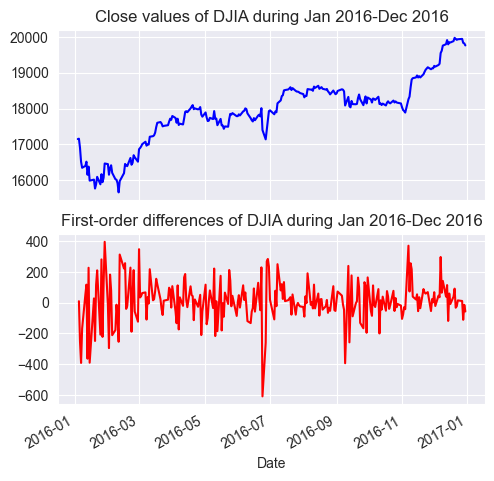

In [102]:
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
djia_df['Close'].plot(ax=ax[0], color='b')
ax[0].set_title('Close values of DJIA during Jan 2016-Dec 2016')
first_order_diff.plot(ax=ax[1], color='r')
ax[1].set_title('First-order differences of DJIA during Jan 2016-Dec 2016')

- A continuación, se calcula el `ACF` para diferentes rezagos y se verifica la prueba de Ljung-Box. La figura siguiente muestra la `ACF` de los valores de cierre del `DJIA` y también para la serie temporal de diferencias de primer orden. Obsérvese que para las series diferenciadas, la `ACF` no muestra un patrón predecible y cae repentinamente cerca de cero. Además, el valor $p$ de la prueba es de $0.894$ para $lag=10$ nos hace aceptar la hipótesis nula de la prueba de Ljung-Box para las series diferenciadas

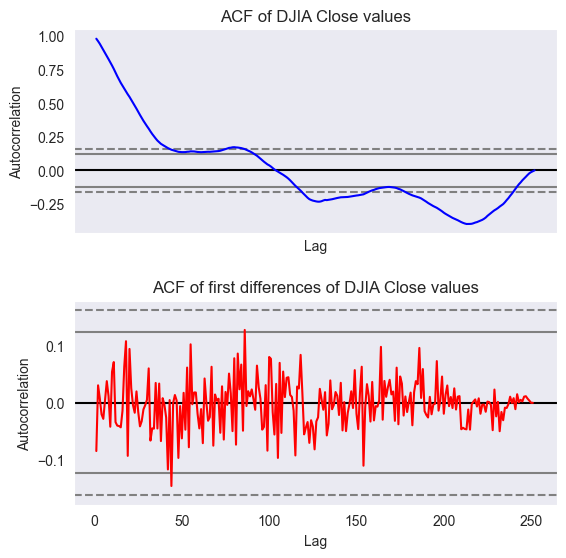

In [103]:
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
autocorrelation_plot(djia_df['Close'], color='b', ax=ax[0])
ax[0].set_title('ACF of DJIA Close values')
autocorrelation_plot(first_order_diff.iloc[1:], color='r', ax=ax[1])
ax[1].set_title('ACF of first differences of DJIA Close values')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

- Para la prueba de Ljung-Box, utilizamos la función `acf` del paquete `statsmodels.tsa.stattools`. La función `acf` está hecha para devolver las autocorrelaciones, los intervalos de confianza, los estadísticos $Q$ y los valores $p$ de la prueba

In [104]:
acf_djia, confint_djia, qstat_djia, pvalues_djia = stattools.acf(djia_df['Close'],
                                                                 nlags=20,
                                                                 qstat=True,
                                                                 alpha=0.05)

- Comprobemos si con un nivel de confianza del 95% ($\alpha=0.05$) si se rechaza la hipótesis nula en cualquiera de los rezagos

In [105]:
alpha = 0.05
for l, p_val in enumerate(pvalues_djia):
    if p_val > alpha:
        print('Null hypothesis is accepted at lag = {} for p-val = {}'.format(l, p_val))
    else:
        print('Null hypothesis is rejected at lag = {} for p-val = {}'.format(l, p_val))

Null hypothesis is rejected at lag = 0 for p-val = 2.8575062763851745e-55
Null hypothesis is rejected at lag = 1 for p-val = 1.7871763971271254e-105
Null hypothesis is rejected at lag = 2 for p-val = 9.927155881909959e-154
Null hypothesis is rejected at lag = 3 for p-val = 8.084096278834598e-200
Null hypothesis is rejected at lag = 4 for p-val = 9.125287802249553e-244
Null hypothesis is rejected at lag = 5 for p-val = 1.0907828815951678e-285
Null hypothesis is rejected at lag = 6 for p-val = 0.0
Null hypothesis is rejected at lag = 7 for p-val = 0.0
Null hypothesis is rejected at lag = 8 for p-val = 0.0
Null hypothesis is rejected at lag = 9 for p-val = 0.0
Null hypothesis is rejected at lag = 10 for p-val = 0.0
Null hypothesis is rejected at lag = 11 for p-val = 0.0
Null hypothesis is rejected at lag = 12 for p-val = 0.0
Null hypothesis is rejected at lag = 13 for p-val = 0.0
Null hypothesis is rejected at lag = 14 for p-val = 0.0
Null hypothesis is rejected at lag = 15 for p-val = 0.

- Obtengamos los intervalos de confianza, los estadísticos $Q$ de Ljung-Box y los valores $p$ para los valores diferenciados del DJIA Close

In [106]:
acf_first_diff, confint_first_diff,\
qstat_first_diff, pvalues_first_diff = stattools.acf(first_order_diff.iloc[1:],
                                                     nlags=20,
                                                     qstat=True,
                                                     alpha=0.05)

- Comprobemos si con un nivel de confianza del 95% ($\alpha = 0.05$) si se rechaza la hipótesis nula en cualquiera de los rezagos

In [107]:
alpha = 0.05
for l, p_val in enumerate(pvalues_first_diff):
    if p_val > alpha:
        print('Null hypothesis is accepted at lag = {} for p-val = {}'.format(l, p_val))
    else:
        print('Null hypothesis is rejected at lag = {} for p-val = {}'.format(l, p_val))

Null hypothesis is accepted at lag = 0 for p-val = 0.17742519268365275
Null hypothesis is accepted at lag = 1 for p-val = 0.35711074717194846
Null hypothesis is accepted at lag = 2 for p-val = 0.5569664476694902
Null hypothesis is accepted at lag = 3 for p-val = 0.7025937592112146
Null hypothesis is accepted at lag = 4 for p-val = 0.7937258941281415
Null hypothesis is accepted at lag = 5 for p-val = 0.8806452939902651
Null hypothesis is accepted at lag = 6 for p-val = 0.9058055508095896
Null hypothesis is accepted at lag = 7 for p-val = 0.9461503874902826
Null hypothesis is accepted at lag = 8 for p-val = 0.9529107001186853
Null hypothesis is accepted at lag = 9 for p-val = 0.9452880323047997
Null hypothesis is accepted at lag = 10 for p-val = 0.9103701842715781
Null hypothesis is accepted at lag = 11 for p-val = 0.9303312940619602
Null hypothesis is accepted at lag = 12 for p-val = 0.9412519715905939
Null hypothesis is accepted at lag = 13 for p-val = 0.9498882104867831
Null hypothesi

## Diferenciación de segundo orden

- En algunos casos, la diferenciación de primer orden no estaciona la serie temporal y, por tanto, los datos se diferencian otra vez para generar una serie temporal estacionaria. Por lo tanto, la serie temporal diferenciada de segundo orden se genera de la siguiente manera

$$y_{t}'' = y_{t}' - y_{t-1}' = (y_{t} - y_{t-1}) - (y_{t-1} - y_{t-2}) = y_{t} - 2y_{t-1} +y_{t-2}$$
    
- Las series temporales resultantes de la diferenciación de segundo orden tienen $N - 2$ observaciones. Casi nunca es necesario casi nunca es necesario realizar una diferenciación de orden superior al segundo orden.

## Diferenciación estacional

- Cuando una serie temporal exhibe estacionalidad de un período conocido de $m$ índices temporales, puede ser estacionada tomando diferencias estacionales entre $y_{t}$ y $y_{t-m}$. Estas diferencias tomadas en rezagos de longitud $m$ son indicativas de las estaciones o trimestres de un año. En este caso $m = 12$ y las diferencias se toman entre las observaciones originales que tienen un año de diferencia entre sí. Las diferencias estacionales pueden expresarse como sigue:

$$y_{t}'=y_{t}-y_{t-m}=\epsilon_{t}$$

- Para demostrar el efecto de la diferenciación estacional, volveremos a examinar la serie temporal de las temperaturas medias diarias del río Fisher. Ya hemos visto la serie temporal original y la media mensual, que aparentemente muestran un fuerte comportamiento estacional. La media mensual puede obtenerse ejecutando una operación de agrupación por meses que da como resultado el objeto `pandas.Series` `monthly_mean_temp`. 

- La autocorrelación de esta serie se calcula y traza utilizando la función `autocorrelation_plot` de la `API` `pandas.plotting` y se muestra en el siguiente gráfico. La función `autocorrelación_plot` es útil para comprobar la presencia de autocorrelación estadísticamente significativa en una serie temporal. Como se muestra en la siguiente figura, también traza los intervalos de confianza superior e inferior para niveles de confianza del 95% ($\alpha$ = 0.05; línea punteada gruesa) y del 99% ($\alpha$ = 0.01; línea punteada fina).

- La `ACF` de la temperatura media mensual del río Fisher oscila por encima y por debajo de los intervalos de confianza del 99% para varios rezagos. Por lo tanto, las temperaturas medias mensuales forman una serie temporal no estacionaria debido a la estacionalidad.

In [108]:
daily_temp = pd.read_excel('datasets/mean-daily-temperature-fisher-river.xlsx')
daily_temp.head()

,Date,Mean_Temperature
0,1988-01-01,-23.0
1,1988-01-02,-20.5
2,1988-01-03,-22.0
3,1988-01-04,-30.5
4,1988-01-05,-31.0


- Hacemos que la fecha formateada sea el índice de la fila del conjunto de datos y elimine la columna `Date`

In [109]:
daily_temp.index = daily_temp['Date'].map(lambda date: pd.to_datetime(date, '%Y-%m-%d'))
daily_temp.drop('Date', axis=1, inplace=True)
daily_temp.head()

,Mean_Temperature
Date,
1988-01-01,-23.0
1988-01-02,-20.5
1988-01-03,-22.0
1988-01-04,-30.5
1988-01-05,-31.0


<Axes: title={'center': 'Daily temperatures of Fisher River, TX, US'}, xlabel='Date'>

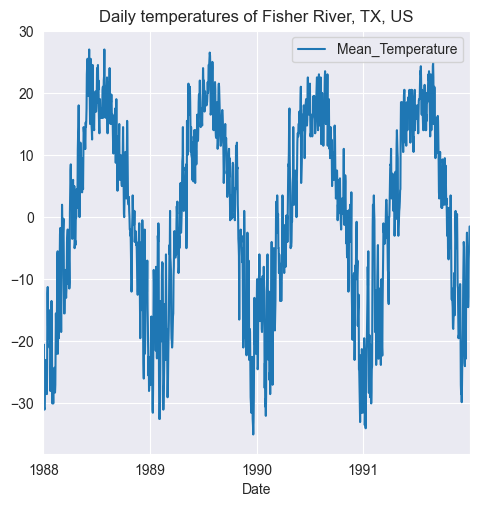

In [110]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Daily temperatures of Fisher River, TX, US')
daily_temp.plot(ax=ax)

- Calculamos la temperatura media mensual

In [111]:
montly_resample = daily_temp['Mean_Temperature'].resample('M')
monthly_mean_temp = montly_resample.mean()
print('Shape of monthly mean temperature dataset:', monthly_mean_temp.shape)
monthly_mean_temp.head()

Shape of monthly mean temperature dataset: (48,)


Date
1988-01-31   -22.137097
1988-02-29   -19.025862
1988-03-31    -8.258065
1988-04-30     2.641667
1988-05-31    11.290323
Freq: M, Name: Mean_Temperature, dtype: float64

- Trazamos la temperatura media mensual

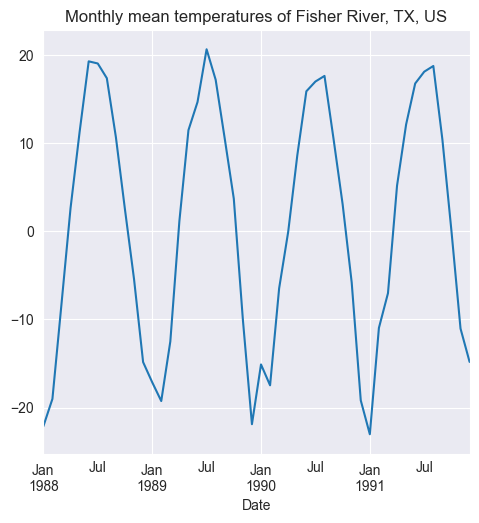

In [112]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Monthly mean temperatures of Fisher River, TX, US')
monthly_mean_temp.plot(ax=ax);

- Trazamos la ACF de la temperatura media mensual utilizando `pandas.tools.plotting.autocorrelation_plot`

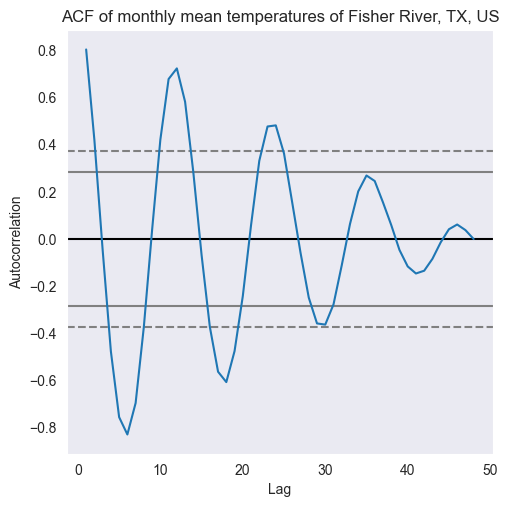

In [113]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('ACF of monthly mean temperatures of Fisher River, TX, US')
autocorrelation_plot(monthly_mean_temp, ax=ax);

- Tomamos las diferencias estacionales con un periodo de 12 meses en las temperaturas medias mensuales. La diferenciación estacional deja valores nulos en sus primeros 12 elementos, que se eliminan antes del análisis:

In [114]:
seasonal_diff = monthly_mean_temp.diff(12)
seasonal_diff = seasonal_diff[12:]

- Trazamos las diferencias estacionales. Las diferencias estacionales parecen ser variaciones aleatorias, como se muestra en la siguiente figura

<Axes: title={'center': 'Seasonal differences'}, xlabel='Date'>

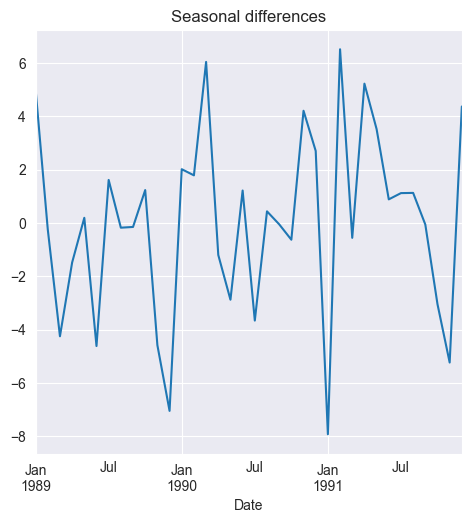

In [115]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Seasonal differences')
seasonal_diff.plot(ax=ax)

- Trazamos las diferencias estacionales. Volvemos a utilizar la función `autocorrelation_plot` para generar la `ACF` de la serie diferenciada y los intervalos de confianza al 99% del nivel de confianza. Podemos ver en la siguiente figura que la `ACF` nunca cruza los intervalos de confianza del 99% para rezagos que varían de 0 a más de 35

<Axes: title={'center': 'ACF of Seasonal differences'}, xlabel='Lag', ylabel='Autocorrelation'>

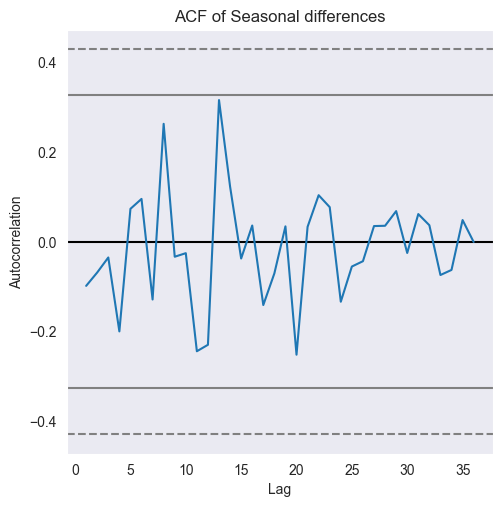

In [116]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('ACF of Seasonal differences')
autocorrelation_plot(seasonal_diff, ax=ax)

- Realice la prueba de Ljung-Box sobre la temperatura media mensual para obtener los valores $p$. Utilizaremos rezagos de hasta 10. Los valores p reales se confirman ejecutando la función `stattools.acf` en los datos medios mensuales de la siguiente manera

In [117]:
_, _, _, pval_monthly_mean = stattools.acf(monthly_mean_temp,
                                           nlags=10, 
                                           qstat=True, 
                                           alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_monthly_mean<=0.05))

Null hypothesis is rejected for lags: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),)


- La prueba de Ljung-Box se realiza también con las series diferenciadas estacionalmente

In [118]:
_, _, _, pval_seasonal_diff = stattools.acf(seasonal_diff,
                                            nlags=10, 
                                            qstat=True, 
                                            alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_seasonal_diff<=0.05))

Null hypothesis is rejected for lags: (array([], dtype=int64),)


- No hay rezagos para los que se rechace la hipótesis nula de la prueba de Ljung-Box.

- En este punto, es importante señalar que en algunos casos se realiza una diferenciación de primer orden después de de las diferencias estacionales para lograr la estacionariedad de los datos transformados. La serie resultante $y_{t}''$ puede calcularse a partir de la original de la siguiente manera

$$y_{t}''=y_{t}'-y_{t-1}'=(y_{t}-y_{t-m})-(y_{t-1}-y_{t-m-1})$$
    
- La elección de una estrategia de diferenciación puede determinarse mediante un análisis exploratorio de los datos como los descritos hasta ahora. Sin embargo, cuando es difícil determinar qué transformaciones son necesarias para la estacionarización, se realiza la prueba ADF para una orientación.

## Prueba de Dickey-Fuller aumentada

- Las pruebas estadísticas para determinar objetivamente si se requiere la diferenciación para estacionar una serie temporal se conocen como pruebas de raíz unitaria. Existen varias pruebas de este tipo, de las cuales la prueba `ADF` es una de las pruebas de raíz unitaria, que se utiliza más comúnmente para verificar la no estacionariedad de la serie temporal original. 

- Según la prueba `ADF`, en presencia de de autocorrelación, las diferencias de primer orden $y_{t}'$ de la serie original pueden ser expresadas como un modelo de regresión lineal del índice temporal anterior y las diferencias de primer orden hasta un retardo de $m$ índices temporales. La regresión lineal sobre $y_{t}'$ puede formularse como sigue

$$y_{t}'=\gamma y_{t-1}+\beta_{1}y_{t-1}'+\beta_{2}y_{t-2}'+\cdots+\beta_{m}y_{t-m}'+\epsilon_{t}$$
    
- En presencia de una fuerte autocorrelación, es necesario diferenciar la serie original y, por tanto, el término $\gamma y_{t-1}$ en el modelo anterior no añadiría información relevante para predecir el cambio del índice de tiempo $t-1$ y $t$. Por lo tanto, la hipótesis nula del `ADF` es $H_{0}:\gamma = 0$ frente a la hipótesis alternativa $H_{1}:\gamma < 0$. En otras palabras, la hipótesis nula es la presencia de raíz unitaria o no estacionariedad, mientras que la hipótesis alternativa sugiere la estacionariedad de los datos.

- Se rechaza la hipótesis nula si el estadístico de prueba de $\gamma$ es inferior al valor crítico negativo para el nivel de confianza dado. En caso de que la serie ya sea estacionaria, el modelo de regresión lineal representa una desviación aleatoria para la que el cambio en el índice de tiempo $t$ depende del valor anterior y no de las diferencias anteriores, que son iids para el proceso estacionario.

- Un enfoque práctico de la determinación del número de rezagos $m$ que se incluirán en la regresión sería variar $m\in\{1,2,\dots,N'\}$, donde $N'$ es un límite superior del rezago, y calcular los valores $p$ de la prueba `ADF` hasta que se rechace la hipótesis nula con un nivel de confianza determinado.

- Apliquemos la prueba `ADF` para verificar la estacionariedad en los datos mensuales de millas de avión de US Airlines recogidos entre 1963 y 1970. Utilizaremos la función `adfuller` de la `API` `statsmodels.tsa.stattools` para realizar las pruebas

- Antes de ejecutar la prueba `ADF`, la serie de tiempo se carga en un `pandas.DataFrame` y como se muestra en la siguiente figura, es evidente que la serie temporal tiene una tendencia alcista, así como como estacionalidad y, por lo tanto, no es estacionaria, lo que se verificará mediante la prueba ADF.

In [119]:
air_miles = pd.read_csv('datasets/us-airlines-monthly-aircraft-miles-flown.csv')
air_miles.index = air_miles.Month

In [120]:
print('Shape of the DataFrame:', air_miles.shape)
air_miles.head()

Shape of the DataFrame: (97, 2)


,Month,U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970
Month,,
1963-01,1963-01,6827.0
1963-02,1963-02,6178.0
1963-03,1963-03,7084.0
1963-04,1963-04,8162.0
1963-05,1963-05,8462.0


- Cambiemos el nombre de la segunda columna

In [121]:
air_miles.rename(columns={'U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970':\
                          'Air miles flown'}, inplace=True)

- Comprobamos si existen datos faltantes y eliminamos la fila correspondiente

In [122]:
missing = pd.isnull(air_miles['Air miles flown'])
print('Number of missing values found:', missing.sum())
air_miles = air_miles.loc[~missing, :]

Number of missing values found: 1


- Trazamos la serie temporal de millas aéreas voladas

Text(0.5, 1.0, 'Monthly air miles flown during 1963 - 1970')

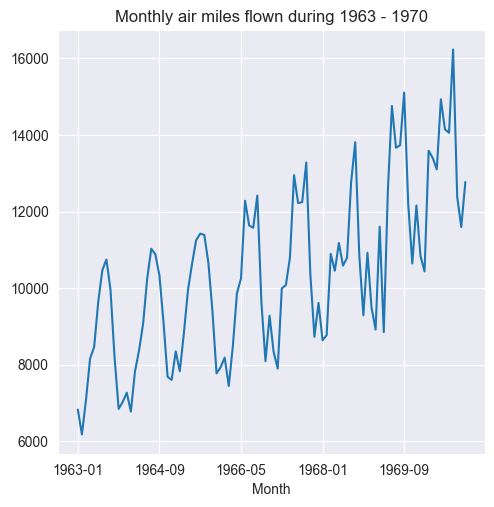

In [123]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
air_miles['Air miles flown'].plot(ax=ax)
ax.set_title('Monthly air miles flown during 1963 - 1970')

In [124]:
adf_result = stattools.adfuller(air_miles['Air miles flown'], autolag='AIC')

In [125]:
print('p-val of the ADF test in air miles flown:', adf_result[1])

p-val of the ADF test in air miles flown: 0.9945022811234028


- El primer argumento de la función es la segunda columna del DataFrame y la palabra clave argumento `autolag='AIC'` indica a la función que elija un número adecuado de rezagos para la prueba maximizando el criterio de información de Akaike (AIC). Alternativamente, la prueba puede ejecutarse con el número de rezagos dado por el usuario en el argumento de palabra clave `maxlag`. Preferimos utilizar el AIC en lugar de dar un retardo para evitar el ensayo y error de encontrar el mejor retardo requerido para ejecutar la prueba.

- No es de extrañar que el valor $p$ de la prueba `ADF` sea de 0.9945, lo que confirma lo que entendemos del análisis exploratorio de los datos. La función `adfuller` devuelve varios valores en una tupla. Hemos utilizado la variable `adf_resultado` para almacenar los resultados y referirnos a su segundo elemento `adf_result[1]` para recuperar el valor $p$ de la prueba. Otras cosas interesantes devueltas por la función son `usedlag`, que es el número de rezagos realmente utilizados para ejecutar la prueba y los valores críticos de la estadística de la prueba a niveles de confianza del 1%, 5% y 10% de confianza.

## Descomposición de series temporales

- El objetivo de la descomposición de las series temporales es modelar la tendencia a largo plazo y la estacionalidad, así como también estimar la serie temporal global como una combinación de ellas. Dos modelos populares para la descomposición de descomposición de series temporales son:

    - Modelo aditivo
    - Modelo multiplicativo

- El `modelo aditivo` formula la serie temporal original $y_{t}$ como la suma de los componentes de ciclo de tendencia $F_{t}$ y los componentes estacionales $S_{t}$ de la siguiente manera:

$$y_{t}=F_{t}+S_{t}+\varepsilon_{t}$$

- Los residuos $\varepsilon_{t}$ obtenidos tras ajustar los componentes de tendencia y estacional son las variaciones irregulares. El modelo aditivo suele aplicarse cuando existe un componente cíclico de tendencia dependiente del tiempo, pero una estacionalidad independiente que no cambia con el tiempo.

- El modelo de descomposición multiplicativa, que da la serie temporal como producto de la tendencia, estacionalidad e irregularidad, es útil cuando existe una estacionalidad que varía en el tiempo:

$$y_{t}=F_{t}\times S_{t}\times \varepsilon_{t}$$

- En esta sección, discutiremos los siguientes dos métodos populares para estimar la tendencia y los componentes estacionales:

    - Método de medias móviles
    - Descomposición estacional y de tendencia mediante el paquete `Python statsmodels.tsa`

## Medias móviles

- En esta sección, cubriremos las medias móviles a través de los siguientes temas:

    - Cálculo de medias móviles y su aplicación en el suavizado de series temporales
    - Ajuste de la estacionalidad mediante medias móviles
    - Media móvil ponderada
    - Descomposición de series temporales mediante medias móviles

## Medias móviles y efectos de suavización

- Las **medias móviles (MA)** en un índice temporal $t$ estiman el componente de ciclo de tendencia media $F_{t}$ y se calcula sacando la media a lo largo del periodo de tiempo $t ± k$, donde $k$ es el rango de la **MA**

$$\hat{F}_{t}=\frac{y_{t-k}+y_{t-k+1}+\cdots+y_{t}+\cdots+y_{t+k-1}+y_{t+k}}{2k+1}$$

- La toma de medias móviles tiene el efecto de suavizar la serie temporal original eliminando el ruido aleatorio. Comúnmente, el número total de observaciones $m = 2k + 1$ se utiliza para describir la media móvil como **MA** de orden $m$, que en adelante se denotará como $\hat{F}_{t}^{(m)}$.

- Estudiemos las medias móviles y su efecto de suavización mediante el ejemplo de las cotizaciones de las acciones de IBM de 1962 a 1965. El conjunto de datos de esta serie temporal se ha descargado de http://datamarket.com. La serie temporal original, como se muestra en azul en la siguiente figura tiene movimientos irregulares debidos al ruido aleatorio. La **MA** de 5 días (o de orden 5), en rojo, es más suave que la serie original y muestra una estimación del patrón de tendencia-ciclo. La **MA** de 5 días ha producido aparentemente algún efecto de suavización en la serie temporal original como se ve en la siguiente figura.

- La serie temporal original se ha cargado en un `panda.DataFrame`. A continuación, la segunda columna, que contiene los precios de las acciones, es renombrada como `Close_Price` por conveniencia. A continuación, se calcula la **MA** de 5 días se calcula aplicando la función rolling a la columna `Close_Price` del `DataFrame`. La implementación es la siguiente:

In [126]:
import pandas as pd
from matplotlib import pyplot as plt

- Cargamos el conjunto de datos en un `pandas.DataFrame`

In [127]:
ibm_df = pd.read_csv('datasets/ibm-common-stock-closing-prices.csv')
ibm_df.index = ibm_df['Date']

In [128]:
print('Shape of the dataframe:', ibm_df.shape)
ibm_df.head()

Shape of the dataframe: (1009, 2)


,Date,IBM common stock closing prices
Date,,
1962-01-02,1962-01-02,572.00
1962-01-03,1962-01-03,577.00
1962-01-04,1962-01-04,571.25
1962-01-05,1962-01-05,560.00
1962-01-08,1962-01-08,549.50


- Renombramos la segunda columna

In [129]:
ibm_df.rename(columns={'IBM common stock closing prices': 'Close_Price'}, inplace=True)
ibm_df.head()

,Date,Close_Price
Date,,
1962-01-02,1962-01-02,572.00
1962-01-03,1962-01-03,577.00
1962-01-04,1962-01-04,571.25
1962-01-05,1962-01-05,560.00
1962-01-08,1962-01-08,549.50


- Eliminamos datos faltantes

In [130]:
missing = (pd.isnull(ibm_df['Date'])) & (pd.isnull(ibm_df['Close_Price']))
print('No. of rows with missing values:', missing.sum())
ibm_df = ibm_df.loc[~missing, :]

No. of rows with missing values: 0


- Para ilustrar la idea de la media móvil, calculamos una media móvil semanal tomando una ventana de 5 días en lugar de 7, ya que la negociación se produce sólo durante los días laborables.

In [131]:
ibm_df['5-Day Moving Avg'] = ibm_df['Close_Price'].rolling(5).mean()

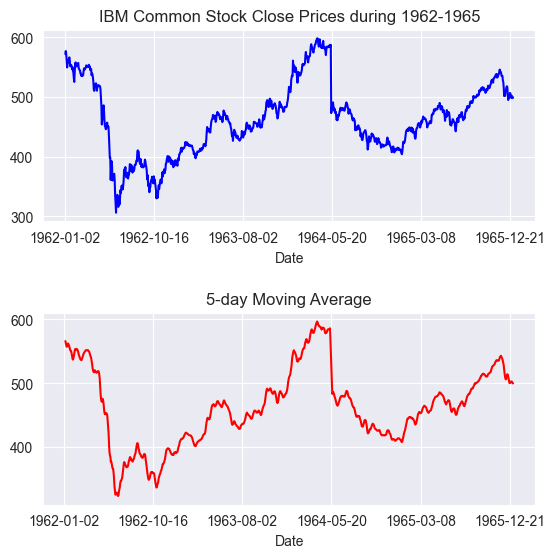

In [132]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,1,1)
ibm_df['Close_Price'].plot(ax=ax, color='b')
ax.set_title('IBM Common Stock Close Prices during 1962-1965')
ax = fig.add_subplot(2,1,2)
ibm_df['5-Day Moving Avg'].plot(ax=ax, color='r')
ax.set_title('5-day Moving Average')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

- La mencionada **MA** de orden impar $m = 2\times2 + 1 = 5$ y es simétrica con igual número de observaciones a ambos lados del índice de tiempo $t$ en el que se calcula la **MA**. Sin embargo, es posible tener una MA asimétrica de orden par $m = 2k$.

- La asimetría de una media móvil de orden par puede eliminarse tomando una segunda media móvil de orden par. Ilustremos esto considerando que la primera media móvil de orden dos y calculada como:

$$\hat{F}_{t}^{(2)}=\frac{y_{t-1}+y_{t}}{2}$$

- Otra media móvil de segundo orden, aplicada a la serie producirá una media móvil simétrica que tiene una observación a ambos lados de la observación de la serie temporal original en el índice $t$

$$2\times\hat{F}_{t}^{(2)}=\frac{\hat{F}_{t}^{(2)}+\hat{F}_{t+1}^{(2)}}{2}=\frac{1}{2}\left[\frac{y_{t-1}+y_{t}}{2}+\frac{y_{t}+y_{t+1}}{2}\right]=\frac{1}{4}y_{t-1}+\frac{1}{2}y_{t}+\frac{1}{4}y_{t+1}$$

- En general podemos crear $n\times\hat{F}_{t}^{(m)}$ medias moviles, primero tomando un moving average de orden $m$ seguido por uno de orden $n$. Además, debemos notar que con el objetivo de producir **MA** simétricas, $m$ y $n$ deben ser ambos impares o pares. Aclararemos esto a través de los cálculos de un **MA** $3\times \hat{F}_{t}^{(3)}$ eñ cual esta dado por

$$\begin{align*}\hat{F}_{t}^{(3)}&=\frac{y_{t-1}+y_{t}+y_{t+1}}{3}\end{align*}\\3\times\hat{F}_{t}^{(3)}=\frac{\hat{F}_{t-1}^{(3)}+\hat{F}_{t}^{(3)}+\hat{F}_{t+1}^{(3)}}{3}$$

- La **MA** $3\times\hat{F}_{t}^{(3)}$ se puede desglosar aún más en términos de la serie original de la siguiente manera:

$$\begin{align*}3\times\hat{F}_{t}^{(3)}&=\frac{1}{3}\left[\frac{y_{t-2}+y_{t-1}+y_{t}}{3}+\frac{y_{t-1}+y_{t}+y_{t+1}}{3}+\frac{y_{t}+y_{t+1}+y_{t+2}}{3}\right]\\
&=\frac{1}{9}y_{t-2}+\frac{2}{9}y_{t-1}+y_{t}+\frac{2}{9}y_{t+1}+\frac{1}{9}y_{t+2}\end{align*}$$

- Por el contrario, consideremos un **MA** $2\times\hat{F}_{t}^{(3)}$ que puede ser expresado en terminos de la serie de tiempo original como sigue

$$\begin{align*}2\times\hat{F}_{t}^{(3)}&=\frac{1}{2}\left[\frac{y_{t-1}+y_{t}+y_{t+1}}{3}+\frac{y_{t}+y_{t+1}+y_{t+2}}{3}\right]\\&=\frac{1}{6}y_{t-1}+\frac{1}{3}y_{t}+\frac{1}{3}y_{t+1}+\frac{1}{6}y_{t+2}\end{align*}$$

- La cual tiene más número de observaciones a la derecha de $y_{t}$ que a la izquierda y por tanto es asimétrico. Como se verá, los **MAs** simétricos tienen una interesante aplicación para estimar tendencia-ciclo para series temporales estacionales. Esto se explica en la siguiente sección.

- También cabe destacar que una media móvil repetida de la forma $n\times\hat{F}_{t}^{(m)}$ produce medias ponderadas de las observaciones de la serie temporal original. El peso asignado a observaciones en el índice de tiempo $t$ es el más alto y desciende a medida que nos alejamos de $t$ en ambos lados. Por lo tanto, $n\times\hat{F}_{t}^{(m)}$ puede utilizarse para generar medias móviles ponderadas.

- El gráfico que se presenta aquí muestra seis medias móviles, a saber $\hat{F}_{t}^{(2)}, 2\times\hat{F}_{t}^{(2)}, \hat{F}_{t}^{(4)}, 2\times\hat{F}_{t}^{(4)}, \hat{F}_{t}^{(3)}$ and $3\times\hat{F}_{t}^{(3)}$ para los precios de las acciones de IBM hasta los primeros 45 días. Como se ilustra, la suavidad de los **MAs** resultantes mejora con el aumento del orden $m$ y el número de repeticiones $n$.

- En la siguiente figura, las **MAs** de tipo $\hat{F}_{t}^{(m)}$ se indican con líneas continuas, mientras que las del tipo $n\times\hat{F}_{t}^{(m)}$ se representan con líneas discontinuas. Para generar las seis **MAs** mencionadas hemos utilizado ampliamente las funciones `rolling` y `mean` como se muestra en los siguientes fragmentos de código:

In [133]:
MA2 = ibm_df['Close_Price'].rolling(window=2).mean()
TwoXMA2 = MA2.rolling(window=2).mean()

MA4 = ibm_df['Close_Price'].rolling(window=4).mean()
TwoXMA4 = MA4.rolling(window=2).mean()

MA3 = ibm_df['Close_Price'].rolling(window=3).mean()
ThreeXMA3 = MA3.rolling(window=3).mean()

- Eliminemos los valores `NaN` de las variables anteriores

In [134]:
TwoXMA2 = MA2.dropna()
TwoXMA4 = MA4.dropna()
ThreeXMA3 = MA3.dropna()

Text(0.5, 1.0, '3 day MA & 3X 3day MA')

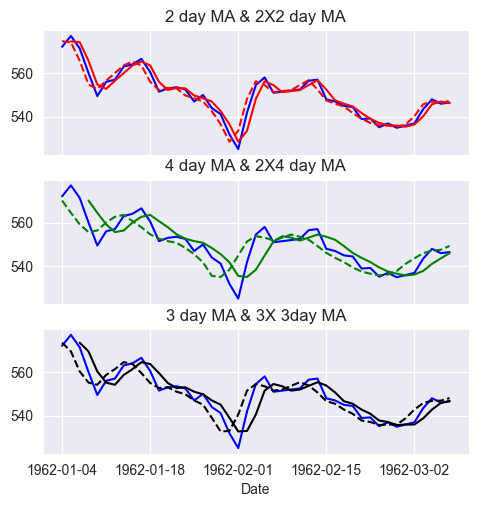

In [135]:
f, axarr = plt.subplots(3, sharex=True)
f.set_size_inches(5.5, 5.5)

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0])
MA2.iloc[:45].plot(color='r', linestyle = '-', ax=axarr[0])
TwoXMA2.iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('2 day MA & 2X2 day MA')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1])
MA4.iloc[:45].plot(color='g', linestyle = '-', ax=axarr[1])
TwoXMA4.iloc[:45].plot(color='g', linestyle = '--', ax=axarr[1])
axarr[1].set_title('4 day MA & 2X4 day MA')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[2])
MA3.iloc[:45].plot(color='k', linestyle = '-', ax=axarr[2])
ThreeXMA3.iloc[:45].plot(color='k', linestyle = '--', ax=axarr[2])
axarr[2].set_title('3 day MA & 3X 3day MA')

## Ajuste estacional mediante media móvil

- La propiedad de promedio ponderada de las $n\times\hat{F}_{t}^{(m)}$ medias móviles tiene aplicación en suavizar datos con estacionalidad para generar estimaciones de ciclos de tendencia. Por ejemplo, dadas las observaciones trimestrales podemos aplicar la **MA** $2\times\hat{F}_{t}^{(4)}$ para suavizar los datos. Para entender como esto funciona exapndimos $2\times\hat{F}_{t}^{(4)}$ en términos de la serie temporal original:

$$\begin{align*}2\times\hat{F}_{t}^{(4)}&=\frac{\hat{F}_{t}^{(4)}+\hat{F}_{t+1}^{(4)}}{2}\\
&=\frac{1}{1}\left[\frac{y_{t-2}+y_{t-1}+y_{t}+y_{t+1}}{4}+\frac{y_{t-1}+y_{t}+y_{t+1}+y_{t+2}}{4}\right]\\
&=\frac{y_{t-2}}{8}+\frac{y_{t-1}}{4}+\frac{y_{t}}{4}+\frac{y_{t+1}}{4}+\frac{y_{t+2}}{8}\end{align*}$$

- Para los datos trimestrales, el primer y el último término de la **MA** $2\times\hat{F}_{t}^{(4)}$ corresponde al mismo trimestre, pero en años consecutivos y la media trimestral varía a lo largo de un año. Del mismo modo, para los datos mensuales, $2\times\hat{F}_{t}^{(12)}$ generaría una serie suave como estimación del componente de tendencia-ciclo. En el caso de los datos con periodicidades impares, como las observaciones semanales, calculamos el **MA** $\hat{F}_{t}^{(2k+1)}$ por ejemplo $\hat{F}_{t}^{(7)}$ para datos semanales elimina la estacionalidad.

- El enfoque de utilizar **MA** ponderado de la forma $2\times\hat{F}_{t}^{(2k)}$ se ilustra utilizando los datos de producción de cerveza de Australia. La serie temporal representa la producción trimestral de cerveza desde marzo de 1956 a junio de 1994. La serie temporal original y una serie de **MA** $2\times\hat{F}_{t}^{(4)}$ son dibujadas. El código para leer el conjunto de datos y calcular las medias móviles es el siguiente:

In [136]:
import pandas as pd
from matplotlib import pyplot as plt

In [137]:
beer_df = pd.read_csv('datasets/quarterly-beer-production-in-aus-March 1956-June 1994.csv')
beer_df.index = beer_df['Quarter']

In [138]:
print('Shape of the dataframe:', beer_df.shape)
beer_df.head()

Shape of the dataframe: (155, 2)


,Quarter,Quarterly beer production in Australia: megalitres. March 1956 ? June 1994
Quarter,,
1956Q1,1956Q1,284.4
1956Q2,1956Q2,212.8
1956Q3,1956Q3,226.9
1956Q4,1956Q4,308.4
1957Q1,1957Q1,262.0


- Renombramos la segunda columna del `pandas.DataFrame`

In [139]:
beer_df.rename(columns={'Quarterly beer production in Australia: megalitres. March 1956 ? June 1994':'Beer_Prod'},
               inplace=True)

- Eliminamos datos faltantes `NaNs`

In [140]:
missing = (pd.isnull(beer_df['Quarter'])) | (pd.isnull(beer_df['Beer_Prod']))
print('Number of rows with at least one missing values:', missing.sum())
beer_df = beer_df.loc[~missing, :]
print('Shape after removing missing values:', beer_df.shape)

Number of rows with at least one missing values: 1
Shape after removing missing values: (154, 2)


- Para eliminar los patrones estacionales, calculemos la media móvil trimestral 2X4

In [141]:
MA4 = beer_df['Beer_Prod'].rolling(window=4).mean()
TwoXMA4 = MA4.rolling(window=2).mean()
TwoXMA4 = TwoXMA4.loc[~pd.isnull(TwoXMA4)]

- Trazamos la serie temporal original y las medias móviles estacionales

Text(0.5, 1.0, 'Quaterly Beer Production between in Australia and 2X4 quarter MA')

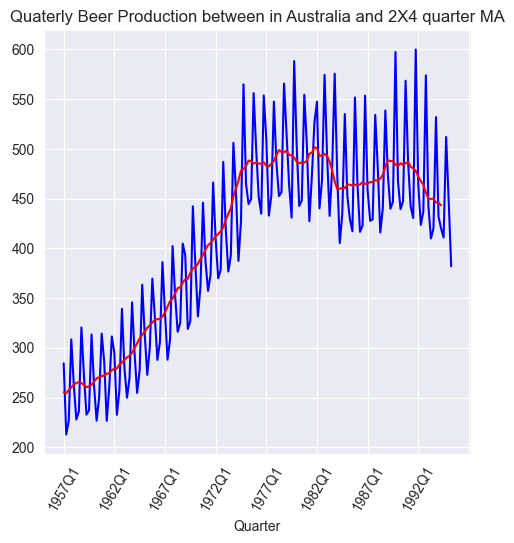

In [142]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
beer_df['Beer_Prod'].plot(ax=ax, color='b', linestyle='-')
TwoXMA4.plot(ax=ax, color='r', linestyle='-')
plt.xticks(rotation=60)
ax.set_title('Quaterly Beer Production between in Australia and 2X4 quarter MA')

- La serie temporal original de las producciones trimestrales de cerveza tiene tendencia y estacionalidad y, por tanto, no es estacionaria. Veamos si podemos estacionar la serie temporal eliminando primero el componente de tendencia y tomando luego las diferencias estacionales. Comenzamos tomando los residuos que quedan después de eliminar el componente de tendencia. Los `residuals` que quedan después de eliminar el componente de tendencia-ciclo se representan en la siguiente figura

In [143]:
residuals = beer_df['Beer_Prod']-TwoXMA4
residuals = residuals.loc[~pd.isnull(residuals)]

Text(0.5, 1.0, 'Residuals in Quaterly Beer Production time series')

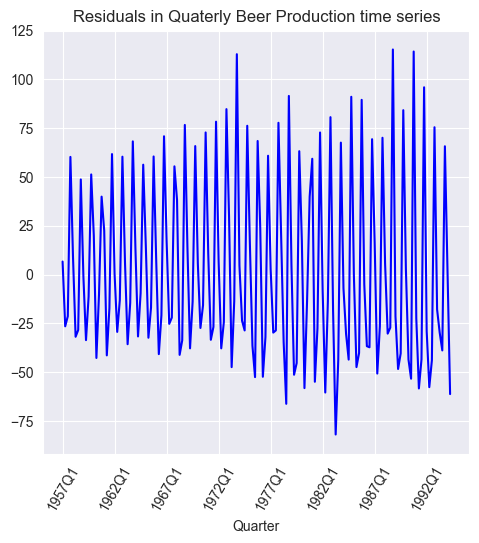

In [144]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
residuals.plot(ax=ax, color='b', linestyle='-')
plt.xticks(rotation=60)
ax.set_title('Residuals in Quaterly Beer Production time series')

- En este punto comprobaremos si los residuos ya están estacionados (aunque poco probable) trazando la función de autocorrelación junto con los intervalos de confianza del 99%. Para obtener este gráfico, que se muestra aquí, utilizaremos la función `autocorrelation_plot` de la **API** `pandas.plotting`

In [145]:
from pandas.plotting import autocorrelation_plot

<Axes: title={'center': 'ACF of Residuals in Quaterly Beer Production time series'}, xlabel='Lag', ylabel='Autocorrelation'>

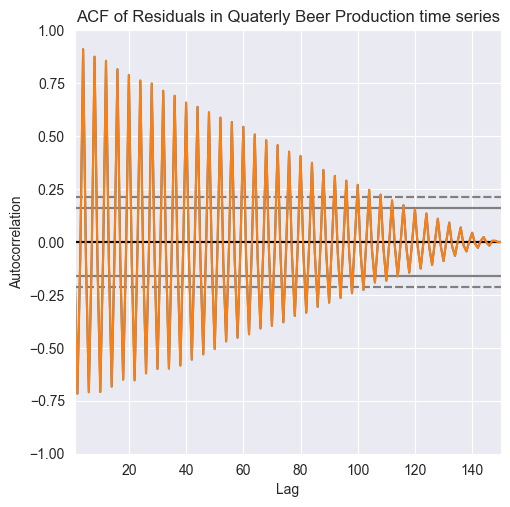

In [146]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
autocorrelation_plot(residuals, ax=ax)
ax.set_title('ACF of Residuals in Quaterly Beer Production time series')
autocorrelation_plot(residuals)

- Claramente, los residuos tienen una fuerte autocorrelación con el **ACF** saltando fuera de los intervalos de confianza para varios valores de rezagos. Así que tendríamos que tomar la diferencia estacional en los residuos. El período de estacionalidad puede determinarse basándose en el hecho de que los datos originales se obtienen de todos los trimestres de los años y muestran la estacionalidad del trimestre. 

- Esto significa que los residuos del primer trimestre de un año se aproximan en magnitud a los residuos del primer trimestre del año anterior y del siguiente. Esta observación nos hace tomar las diferencias a lo largo de períodos de cuatro unidades de tiempo de la siguiente manera:

In [147]:
residuals_qtr_diff = residuals.diff(4)

- Removemos todos los valores faltantes `NaNs`

In [148]:
residuals_qtr_diff = residuals_qtr_diff.loc[~pd.isnull(residuals_qtr_diff)]

- Esperamos que `residuals_qtr_diff` sea una serie de variaciones aleatorias sin estacionalidad y autocorrelación predecible. Para comprobar si esto es así, ejecutamos la función `autocorrelation_plot` en `residuals_qtr_diff` y obtenemos el siguiente gráfico que tiene una **ACF** mayoritariamente aleatoria. Además, el **ACF** queda fuera de los intervalos de confianza del 99% sólo para dos rezagos. Esto significa que al tomar las diferencias estacionales se han estacionado los residuos.

Text(0.5, 1.0, 'ACF of Quaterly Differenced Residuals')

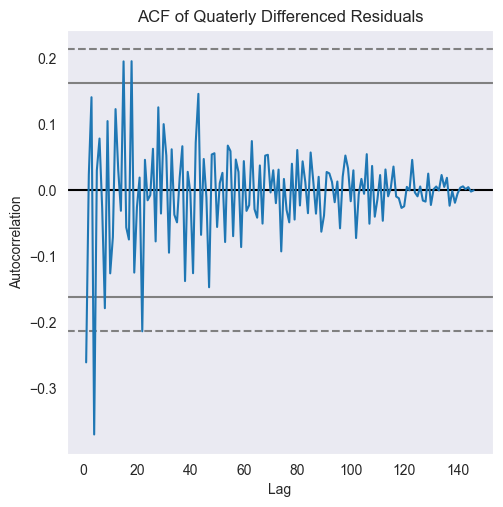

In [149]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
autocorrelation_plot(residuals_qtr_diff, ax=ax)
ax.set_title('ACF of Quaterly Differenced Residuals')

- Nuestro enfoque para estacionar la serie temporal de producción de cerveza trimestral puede ser resumir como sigue:
    1. Tomar estacionalidad **MA** $2\times\hat{F}_{t}^{(4)}$
    2. Calcule los residuos eliminando la **MA** $2\times\hat{F}_{t}^{(4)}$ de la serie de tiempo original
    3. Comprobar la aleatoriedad de la **ACF** de los residuos
    4. Si el **ACF** de los residuos ya es aleatorio entonces los residuos son estacionarios, si no pase a la etapa siguiente.
    5. Tome diferencias estacionales en los residuos con periodicidad de cuatro y compruebe la aleatoriedad de la **ACF** de la serie diferenciada.
- Por lo tanto, las medias móviles estacionales y las diferencias estacionales en los residuos han estacionado la serie temporal original.

## Media móvil ponderada

- En las secciones anteriores, expresamos las medias móviles de la forma $n\times\hat{F}_{t}^{(m)}$ como suma ponderada de las observaciones de la serie temporal original. Vimos cómo las ponderaciones caen para observaciones alejadas del índice temporal en el que se calcula la **MA**. La noción de medias móviles ponderadas, que es simétrica, puede generalizarse para cualquier aplicación de la siguiente manera:

$$\hat{F}_{t}=w_{t-k}y_{t-k}+w_{t-k+1}y_{t-k+1}+\cdots+w_{t}y_{t}+\cdots+w_{t+k-1}y_{t+k-1}+w_{t+k}y_{t+k}$$

- Donde los pesos $w_{t-k}+w_{t-k+1}+\cdots+w_{t-k-1}+w_{t+k}=1$

- Para un simple **MA** $\hat{F}_{t}^{(m)}$ los pesos son $1/m$. Se ha observado que el **MA** ponderado produce una estimación más suave del ciclo de la tendencia. Esto se atribuye al hecho de que todas las observaciones de la serie temporal original, que se utilizan para calcular el **MA** ponderado, no se pondera usando el mismo peso como en el caso de una **MA** $n\times\hat{F}_{t}^{(m)}$. 

- Las observaciones cercanas al indice de tiempo $t$ se les asigna una mayor ponderación, mientras que las más alejadas reciben una ponderación menor. Este enfoque de asignar diferentes pesos en función de la proximidad al índice temporal de interés genera un mejor suavizado de los datos.

## Descomposición de series temporales mediante medias móviles

- Al analizar los datos trimestrales de producción de cerveza, desarrollamos una metodología de estacionar una serie temporal no estacionaria utilizando **MA** estacional y diferencias estacionales. La media móvil estacional se utilizó para estimar el componente de la tendencia cíclica y se calcularon las diferencias periódicas de los residuos dejados por la media móvil estacional

- Otro enfoque podría haber sido deducir tanto la **MA** estacional como los residuos estacionales de la serie original y comprobar la aleatoriedad de los residuos finales. Este enfoque supone que la serie de producción de cerveza es una suma aditiva de los componentes de tendencia-ciclo y estacionales y que lo que queda después de eliminar los dos mencionados son variaciones aleatorias. De hecho, las medias móviles pueden utilizarse de este modo para descomponer una serie temporal. En esta sección vamos a explicar la descomposición de las series temporales basada en las medias móviles.

- Medias móviles de la forma $n\times\hat{F}_{t}^{(m)}$ tienen la propiedad de suavizar la serie temporal original y proporcionar una estimación del componente de ciclo de la tendencia. La elección de $m$ y $n$ es crucial para determinar el componente de ciclo de tendencia. Normalmente, $m$ es la periodicidad de los datos estacionales y se conoce a priori o se determina mediante un análisis exploratorio de los datos.

- Si $m$ es par las medias móviles $\hat{F}_{t}^{(m)}$ serían asimétricas y, por tanto, carecerían de las propiedades de suavización necesarias para suavizar las sucesivas ocurrencias de las estaciones. Por lo tanto, las medias móviles se toman de la segunda vez para generar $2\times\hat{F}_{t}^{(m)}$ que tiene el necesario alisamiento estacional y da una mejor estimación del componente de tendencia-ciclo. Sin embargo, en el caso de la periodicidad, $\hat{F}_{t}^{(m)}$ se utiliza como estimación del componente de la tendencia cíclica. Por lo tanto, la estimación del componente ciclo-tendencia es $\hat{F}_{t}=2\times\hat{F}_{t}^{(m)}$ o $\hat{F}_{t}^{(m)}$ dependiendo de si $m$ es par o impar.

- En la descomposición de las series temporales mediante medias móviles, se supone que el componente estacional constante de un año a otro o de una semana a otra. La estimación del componente estacional se genera tomando la media estacional de los residuos que quedan tras el ajuste de la tendencia del ciclo. Por ejemplo, si los datos son mensuales, se toma la media mensual de los residuos del ajuste del ciclo de la tendencia.

- Los cálculos diferirán ligeramente entre un modelo aditivo y uno multiplicativo. Por ejemplo, al estimar el componente de tendencia-ciclo $\hat{F}_{t}$ mediante la aplicación de una media móvil, los residuos de un modelo aditivo se calculan mediante $y_{t}-\hat{F}_{t}$ mientras que para un modelo multiplicativo, los residuos son $y_{t}/\hat{F}_{t}$. El componente estacional $\hat{S}_{t}$ se estima ahora a partir de los residuos como promedios por temporada

- Por último, las variaciones irregulares se obtienen realizando un ajuste de tendencia-ciclo y estacional de la serie original de la siguiente manera:

    - Para un modelo de descomposición aditiva: $\varepsilon_{t}=y_{t}-\hat{F}_{t}-\hat{S}_{t}$
    - Para un modelo de descomposición multiplicativa: $\varepsilon_{t}=\frac{y_{t}}{\hat{F}_{t}\times\hat{S}_{t}}$
    
- Ilustremos este enfoque de descomposición de series temporales mediante medias móviles a través de la serie temporal de los kilómetros mensuales de las aeronaves voladas por US Airlines. Aplicamos modelos aditivos y multiplicativo para este conjunto de datos. Comenzamos leyendo el conjunto de datos en un `pandas.DataFrame_miles`. A continuación, se estima el componente de tendencia-ciclo mediante medias móviles $2\times\hat{F}_{t}^{(12)}$ de la siguiente manera

In [150]:
import pandas as pd
import numpy as np
from statsmodels.tsa import stattools
from matplotlib import pyplot as plt

In [151]:
air_miles = pd.read_csv('datasets/us-airlines-monthly-aircraft-miles-flown.csv')
air_miles.index = air_miles['Month']

In [152]:
print('Shape of the DataFrame:', air_miles.shape)
air_miles.head()

Shape of the DataFrame: (97, 2)


,Month,U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970
Month,,
1963-01,1963-01,6827.0
1963-02,1963-02,6178.0
1963-03,1963-03,7084.0
1963-04,1963-04,8162.0
1963-05,1963-05,8462.0


- Cambiemos el nombre de la segunda columna

In [153]:
air_miles.rename(columns={'U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970': 'Air miles flown'}, 
                 inplace=True)
air_miles.head()

,Month,Air miles flown
Month,,
1963-01,1963-01,6827.0
1963-02,1963-02,6178.0
1963-03,1963-03,7084.0
1963-04,1963-04,8162.0
1963-05,1963-05,8462.0


- Comprobar si existen datos faltantes y los eliminamos

In [154]:
missing = pd.isnull(air_miles['Air miles flown'])
print('Number of missing values found:', missing.sum())
air_miles = air_miles.loc[~missing, :]

Number of missing values found: 1


- Estimamos el componente de tendencia mediante la media móvil mensual 2X12

In [155]:
MA12 = air_miles['Air miles flown'].rolling(window=12).mean()
trendComp = MA12.rolling(window=2).mean()

- Para el modelo aditivo, el componente estacional se obtiene restando la tendencia-ciclo de la serie temporal original y tomando las medias mensuales de los residuos. La operación de agrupación para calcular el componente estacional de la siguiente manera

In [156]:
residuals = air_miles['Air miles flown'] - trendComp


month = air_miles['Month'].map(lambda d: d[-2:])
monthwise_avg = residuals.groupby(by=month).aggregate(['mean'])
nb_years = 1970-1963+1

seasonalComp = np.array([monthwise_avg.values]*nb_years).reshape((12*nb_years,))

- Dadas las estimaciones de los componentes de tendencia-ciclo y estacional, obtenemos las variaciones irregulares como sigue para un modelo aditivo

In [157]:
irr_var = air_miles['Air miles flown'] - trendComp - seasonalComp

- La serie temporal original, los componentes de tendencia-ciclo, estacional e irregular se muestran en la siguiente figura

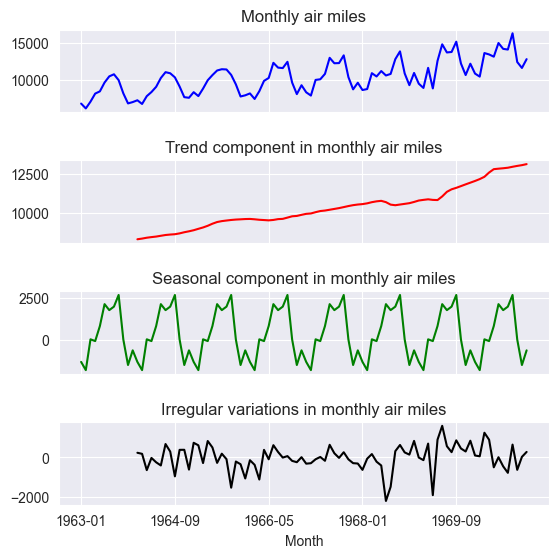

In [158]:
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(5.5, 5.5)

air_miles['Air miles flown'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Monthly air miles')

pd.Series(data=trendComp, index=air_miles.index).plot(ax=axarr[1], color='r', linestyle='-')
axarr[1].set_title('Trend component in monthly air miles')

pd.Series(data=seasonalComp, index=air_miles.index).plot(ax=axarr[2], color='g', linestyle='-')
axarr[2].set_title('Seasonal component in monthly air miles')

pd.Series(data=irr_var, index=air_miles.index).plot(ax=axarr[3], color='k', linestyle='-')
axarr[3].set_title('Irregular variations in monthly air miles')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

- La prueba ADF de `irr_var` da un valor $p$ de 0.0658. Con un nivel de confianza del 90% ($\alpha$=0.10) la hipótesis nula sobre la estacionariedad de las variaciones irregulares puede aceptarse. Sin embargo, vamos a intentemos mejorar aún más mediante el modelo multiplicativo.

In [159]:
adf_result = stattools.adfuller(irr_var.loc[~pd.isnull(irr_var)], autolag='AIC')
print('p-val of the ADF test on irregular variations in air miles flown:', adf_result[1])

p-val of the ADF test on irregular variations in air miles flown: 0.06577411025730076


- La estimación del ciclo de la tendencia mediante **MA** es aplicable incluso para el modelo multiplicativo. Sin embargo, el cálculo del componente estacional cambia. 

In [160]:
residuals = air_miles['Air miles flown'] / trendComp

- Obsérvese que los residuos estacionales `residuals` dividen el componente de tendencia-ciclo de la serie temporal original en el caso de un modelo multiplicativo. Sin embargo, la operación de agrupación en los residuos sigue siendo la misma.

In [161]:
month = air_miles['Month'].map(lambda d: d[-2:])
monthwise_avg = residuals.groupby(by=month).aggregate(['mean'])
nb_years = 1970-1963+1

seasonalComp = np.array([monthwise_avg.values]*nb_years).reshape((12*nb_years,))

- Finalmente, llegamos a las variaciones irregulares para el modelo multiplicativo como sigue

In [162]:
irr_var = air_miles['Air miles flown'] / (trendComp * seasonalComp)

- Obsérvese que los componentes estacionales e irregulares son de menor magnitud que los obtenidos con el modelo aditivo

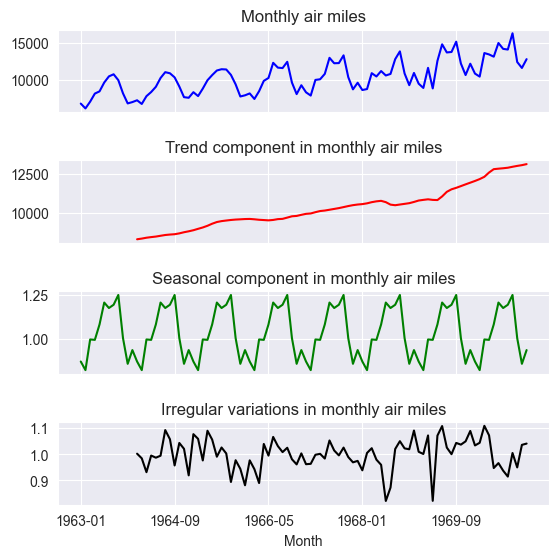

In [163]:
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(5.5, 5.5)

air_miles['Air miles flown'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Monthly air miles')

pd.Series(data=trendComp, index=air_miles.index).plot(ax=axarr[1], color='r', linestyle='-')
axarr[1].set_title('Trend component in monthly air miles')

pd.Series(data=seasonalComp, index=air_miles.index).plot(ax=axarr[2], color='g', linestyle='-')
axarr[2].set_title('Seasonal component in monthly air miles')

pd.Series(data=irr_var, index=air_miles.index).plot(ax=axarr[3], color='k', linestyle='-')
axarr[3].set_title('Irregular variations in monthly air miles')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

- La prueba ADF sobre las variaciones irregulares obtenidas del modelo multiplicativo da un valor $p$ de aproximadamente 0.00018, que es mucho menor que el obtenido con el modelo aditivo.

In [164]:
adf_result = stattools.adfuller(irr_var.loc[~pd.isnull(irr_var)], autolag='AIC')
print('p-val of the ADF test on irregular variations in air miles flown:', adf_result[1])

p-val of the ADF test on irregular variations in air miles flown: 0.00017645280908370803


## Descomposición de series temporales mediante `statsmodels.tsa`

- Hasta ahora, hemos analizado cómo se puede utilizar el **MA** para estimar los componentes de tendencia-ciclo y estacionales de una serie temporal. El método de **MA** funciona bajo el simple supuesto de que componentes estacionales son constantes a lo largo de años consecutivos, semanas o un período adecuado para el caso de uso dado. Sin embargo, la estacionalidad constante puede ser válida para varias aplicaciones que requieren un método avanzado, como la descomposición de la estacionalidad y la tendencia mediante el *suavizado ponderado* de gráficos de dispersión, también conocido como método STL.

- En esta sección, abordaremos las series temporales con patrones complejos utilizando el paquete `Python` `statsmodels.tsa`. Nuestro objetivo será estimar los componentes de tendencia-ciclo y componentes estacionales. Además, utilizaremos las estimaciones de tendencia-ciclo y estacionales para estacionar los datos que serán verificados por la prueba **ADF**

- Consideremos la serie temporal del empleo mensual en Wisconsin, Estados Unidos, para ilustrar el enfoque antes mencionado. Los datos corresponden al periodo comprendido entre enero de 1961 y octubre de 1975 y han sido descargados de http://datamarket.com. Comenzamos cargando el conjunto de datos en un `pandas.DataFrame` `wisc_emp` y ejecutando la prueba **ADF** para la serie temporal original como sigue:

In [165]:
import pandas as pd
import numpy as np
from statsmodels.tsa import stattools
from statsmodels.tsa import seasonal
from matplotlib import pyplot as plt

In [166]:
wisc_emp = pd.read_csv('datasets/wisconsin-employment-time-series.csv')
wisc_emp.index = wisc_emp['Month']

In [167]:
print('Shape of the DataFrame:', wisc_emp.shape)
wisc_emp.head(10)

Shape of the DataFrame: (178, 2)


,Month,Employment
Month,,
1961-01,1961-01,239.6
1961-02,1961-02,236.4
1961-03,1961-03,236.8
1961-04,1961-04,241.5
1961-05,1961-05,243.7
1961-06,1961-06,246.1
1961-07,1961-07,244.1
1961-08,1961-08,244.2
1961-09,1961-09,244.8


In [168]:
missing = (pd.isnull(wisc_emp['Employment'])) | (pd.isnull(wisc_emp['Month']))
print('Number of missing values found:', missing.sum())
wisc_emp = wisc_emp.loc[~missing, :]

Number of missing values found: 0


In [169]:
adf_result = stattools.adfuller(wisc_emp['Employment'], autolag='AIC')
print('p-val of the ADF test on irregular variations in employment data:', adf_result[1])

p-val of the ADF test on irregular variations in employment data: 0.981000018953919


- Un valor $p$ elevado de 0.9810 para la prueba **ADF** de la serie mensual de empleo indica que la serie temporal original es no estacionaria. Por lo tanto, intentamos descomponer la serie temporal y, en consecuencia, estacionarla utilizando la función `seasonal.seasonal_decompose` de la **API** `statsmodels.tsa`. Intentemos primero el modelo aditivo para la descomposición

In [170]:
decompose_model = seasonal.seasonal_decompose(wisc_emp.Employment.tolist(), period=12, model='additive')

- El argumento `period` en el `seasonal.seasonal_decompose` es la periodicidad del comportamiento estacional y la serie temporal original, al ser observaciones mensuales, sospechamos una periodicidad de 12, que puede verificarse mediante un análisis exploratorio de los datos.

-  Los componentes de tendencia-ciclo, estacional y residual de la serie temporal descompuesta son accesibles a través de los atributos del objeto `decompose_model` devuelto por el `seasonal.seasonal_decompose`. Estos componentes se pueden obtener a partir de los siguientes atributos del `decompose_model`:

    - `decompose_model.trend`: Componente de ciclo de tendencia
    - `decompose_model.seasonal`: Componente estacional
    - `decompose_model.resid`: Variaciones irregulares

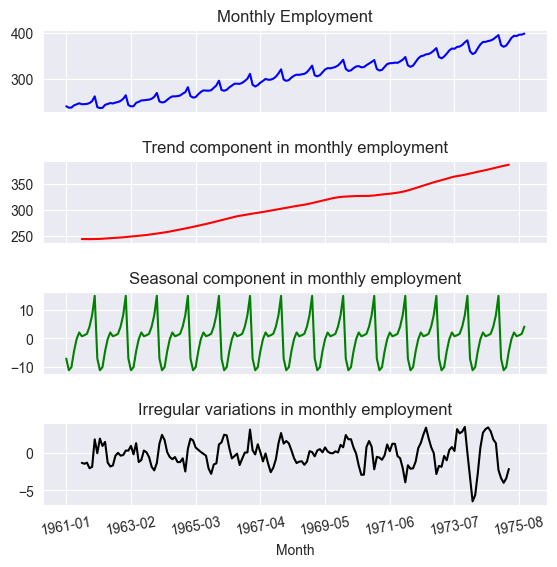

In [171]:
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(5.5, 5.5)

wisc_emp['Employment'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Monthly Employment')

pd.Series(data=decompose_model.trend, index=wisc_emp.index).plot(color='r', linestyle='-', ax=axarr[1])
axarr[1].set_title('Trend component in monthly employment')

pd.Series(data=decompose_model.seasonal, index=wisc_emp.index).plot(color='g', linestyle='-', ax=axarr[2])
axarr[2].set_title('Seasonal component in monthly employment')

pd.Series(data=decompose_model.resid, index=wisc_emp.index).plot(color='k', linestyle='-', ax=axarr[3])
axarr[3].set_title('Irregular variations in monthly employment')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0);
plt.xticks(rotation=10);

- Ahora ejecutamos la prueba **ADF** sobre los residuos del modelo aditivo y obtenemos un valor $p$ de 0.00656, que es mucho menor que el obtenido con la serie temporal original. Sin embargo, construiremos también un modelo multiplicativo

In [172]:
adf_result = stattools.adfuller(decompose_model.resid[np.where(np.isfinite(decompose_model.resid))[0]], 
                                autolag='AIC')
print('p-val of the ADF test on irregular variations in employment data:', adf_result[1])

p-val of the ADF test on irregular variations in employment data: 0.006560931634641491


In [173]:
decompose_model = seasonal.seasonal_decompose(wisc_emp.Employment.tolist(), period=12, model='multiplicative')

Text(0.5, 1.0, 'Irregular variations in monthly employment')

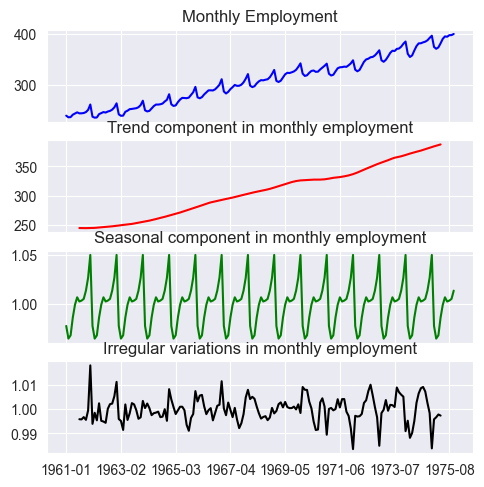

In [174]:
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(5.5, 5.5)

wisc_emp['Employment'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Monthly Employment')

axarr[1].plot(decompose_model.trend, color='r', linestyle='-')
axarr[1].set_title('Trend component in monthly employment')

axarr[2].plot(decompose_model.seasonal, color='g', linestyle='-')
axarr[2].set_title('Seasonal component in monthly employment')

axarr[3].plot(decompose_model.resid, color='k', linestyle='-')
axarr[3].set_title('Irregular variations in monthly employment')

- La prueba **ADF** sobre los residuos de la descomposición multiplicativa da un valor $p$ de 0.00123 que es incluso menor que el obtenido con la descomposición aditiva. Con un nivel de confianza del 99% ($\alpha$=0.01) podemos rechazar la hipótesis nula de la prueba **ADF** y concluir que los residuos del modelo de descomposición multiplicativa es una serie estacionaria

In [175]:
adf_result = stattools.adfuller(decompose_model.resid[np.where(np.isfinite(decompose_model.resid))[0]], 
                                autolag='AIC')
print('p-val of the ADF test on irregular variations in employment data:', adf_result[1])

p-val of the ADF test on irregular variations in employment data: 0.0012347837267732027


## Resumen

- Comenzamos este capítulo hablando de técnicas avanzadas de procesamiento de datos, como el remuestreo, el agrupamiento y el cálculo de ventanas móviles para obtener estadísticas agregadas de una serie temporal. A continuación, describimos las series temporales estacionarias y analizamos las pruebas estadísticas de hipótesis como la prueba de `Ljung-Box` y la prueba de `Dickey Fuller` aumentada para verificar estacionariedad de una serie temporal. 

- La estacionariedad de las series temporales no estacionarias es importante para la predicción de series temporales. Por lo tanto, discutimos dos enfoques diferentes para estacionar las series temporales. En primer lugar, el método de diferenciación, que abarca la primera, la segunda y la diferenciación estacional, se ha descrito para estacionar una serie temporal no estacionaria. En segundo lugar, la descomposición de las series temporales utilizando la **API** `statsmodels.tsa` para modelos aditivos y multiplicativos.

- En el siguiente capítulo, se profundiza en las técnicas de suavización exponencial que tratan con datos de series temporales ruidosos.

## Bibliografía

```{bibliography}
:style: unsrt
```